# Project 3 - Clustering
## Insurance company customers' segmentation 
### This notebook uses the *a2z_insurance.sas7bdat* dataset

(c) Vasco Jesus, Nuno António 2020-2022 - Rev. 1.0

## Dataset description

- **CustID**: numeric - customer ID
- **FirstPolYear**: numeric - year of the customer's first policy. Maybe considered the first year as a customer
- **BirthYear**: numeric - birth year of the customer. The current year of the database is 2016
- **EducDeg**: categorical - academic degree
- **MonthSal**: numerical - monthly gross salary (€)
- **GeoLivArea**: numerical - codes about the area of living. No additional information is available for these codes
- **Children**: numerical - indication if the customer has children (0: no, 1: yes)
- **CustMonVal**: numerical - customer monetary value (CMV). CMV = (annual profit from the customer) x (number of years since a customer) - (acquisition cost)
- **ClaimsRate**: numerical - claims rate. Amount paid by the insurance company (€)/Premiums(€) (in the last two years)
- **PremMotor**: numerical - premiums in the Line of Business (LOB) Motor (€)
- **PremHousehold**: numerical - premiums in the LOB Household (€)
- **PremHealth**: numerical - premiums in the LOB Health (€)
- **PremLife**: numerical - premiums in the LOB Life (€)
- **PremWork**: numerical - premiums in the LOB Work (€)

<br>NOTES about all Premiums:
- Annual premiums (2016)
- Negative premiums may manifest reversals occurred in the current year, paid in previous one(s)

## Work description

### Overview
You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a **Customer Segmentation** in such a way that it will be possible for the **Marketing Department** of an insurance company to **understand all the different Customers’ Profiles better**.  
  
Employing the CRISP-DM process model, you are expected to **define, describe and explain the clusters** you chose. Invest time in **reasoning how you want to do your clustering, possible approaches, and advantages or disadvantages of different decisions. Simultaneous, you should express the marketing approach you recommend for each cluster**.

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the insurance company business/project stakeholder.

## Initializations and data loading

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import file with data to colab
from google.colab import files
files.upload();

Saving a2z_insurance.sas7bdat to a2z_insurance.sas7bdat


In [3]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_sas('a2z_insurance.sas7bdat', format='sas7bdat')

In [4]:
current_year = 2016 # current year of the dataset

## Data Understanding

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10296.0,NaN,NaN,NaN,5148.5,2972.34352,1.0,2574.75,5148.5,7722.25,10296.0
FirstPolYear,10266.0,NaN,NaN,NaN,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.0,53784.0
BirthYear,10279.0,NaN,NaN,NaN,1968.007783,19.709476,1028.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10279,4,b'3 - BSc/MSc',4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10260.0,NaN,NaN,NaN,2506.667057,1157.449634,333.0,1706.0,2501.5,3290.25,55215.0
GeoLivArea,10295.0,NaN,NaN,NaN,2.709859,1.266291,1.0,1.0,3.0,4.0,4.0
Children,10275.0,NaN,NaN,NaN,0.706764,0.455268,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10262.0,NaN,NaN,NaN,300.470252,211.914997,-4.11,190.59,298.61,408.3,11604.42


In [7]:
# Show top rows
ds.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


### Number of Observations

In [8]:
nobs = min(ds.count())
print("The dataset has at least " + str(nobs) + " observations.")

The dataset has at least 10192 observations.


### Number of Variables

In [9]:
nvar = len(ds.columns)
print("The dataset has " + str(nvar) + " variables.")

The dataset has 14 variables.


### Missing Values

In [10]:
# Check missing values
print(ds.isnull().sum())

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64


(TO DO) Comments:
- (TO DO) comment on missing values (example on PCA notebook)

### Histograms of Numerical Variables
Including the categorical variables that are coded as numerical (such as GeoLivArea)

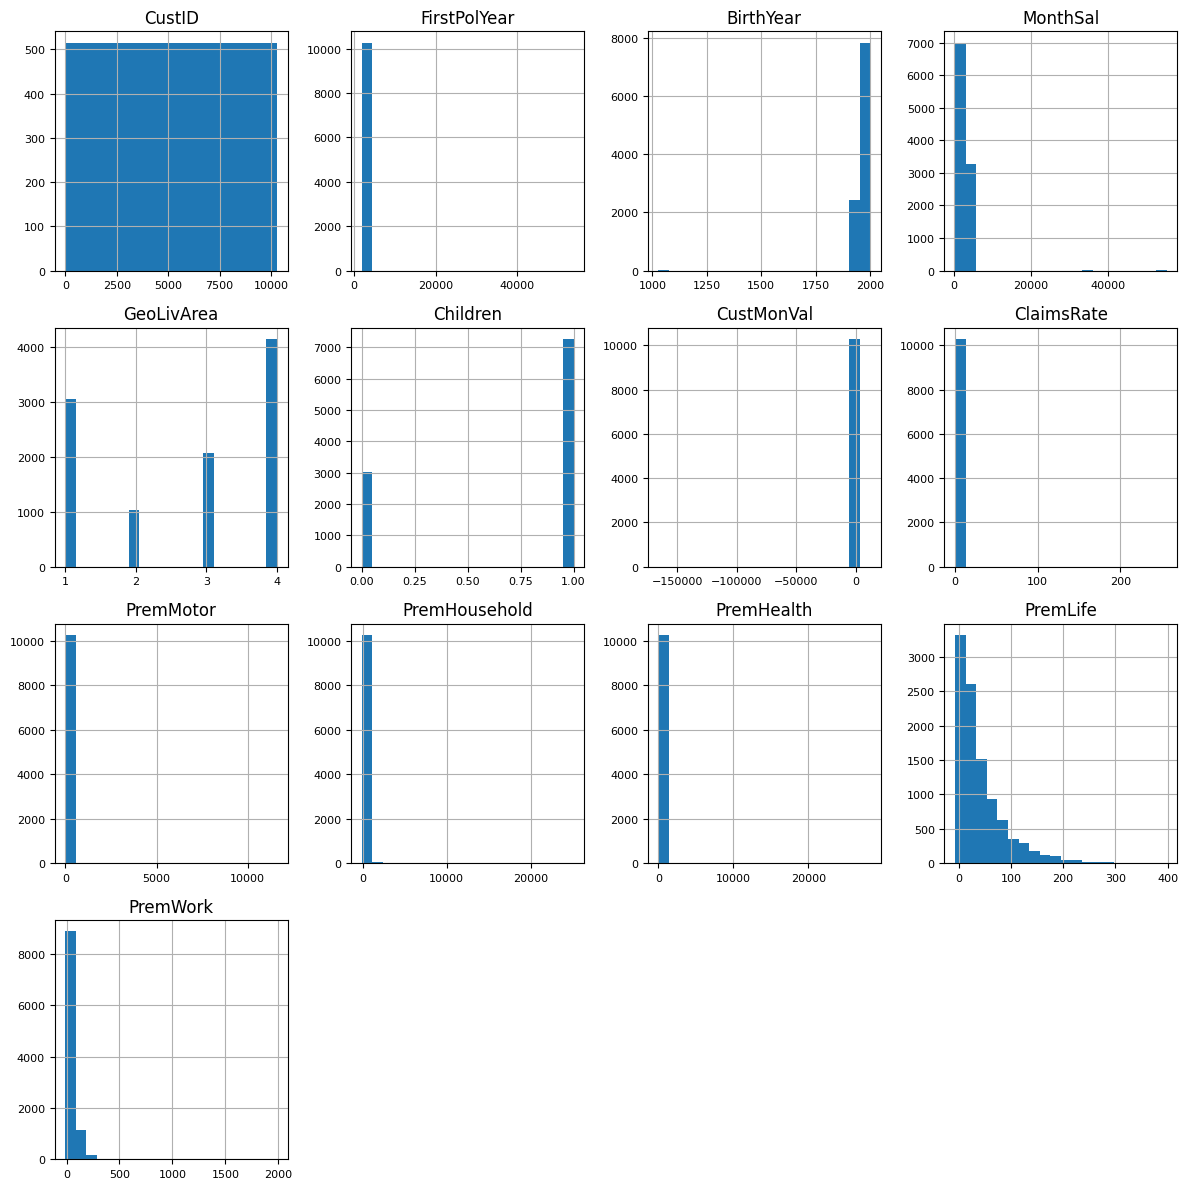

In [11]:
dim = nvar**(1/2) # square root of nvars
dim = int(round(dim, 0)) # round to integer

# plotting histograms for the numerical variables
ds.hist(bins=20, figsize=(12, 12), layout=(dim, dim), xlabelsize=8, ylabelsize=8);
plt.tight_layout() # avoid overlaping of figures

Comments:
- In general, variables are not normally distributed
- Variables have outliers and data errors (very high or very low values which are impossible) and seem to be very concentrated on certain variables (with only a visible bar in a histogram with 20 bins for 6 out of the 13 numeric variables), which poses a challenge to clustering, since it takes into account distances among the values in the different variables
- In the next stage of CRISP-DM model, we should focus on the treatment of this outliers and data errors in order for the clustering not to be distorted by this rare occurences

### Boxplots

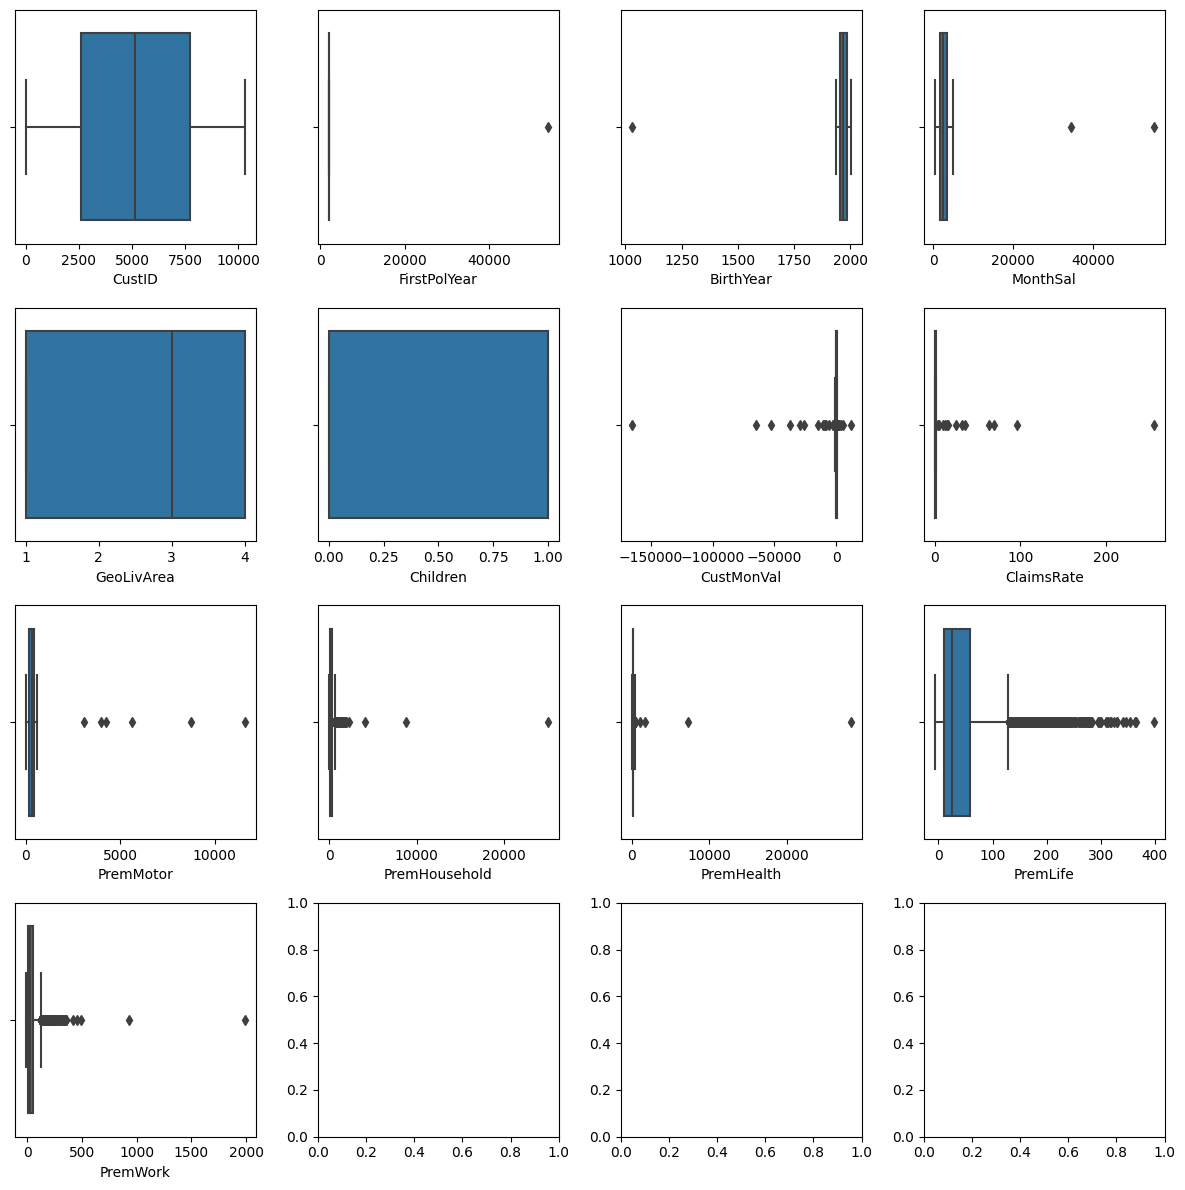

In [12]:
# code from class
# save numerical variables names into a list
numericals=ds.select_dtypes(include=[np.number]).columns.tolist()

# Do boxplots on all numeric variables
fig, ax = plt.subplots(dim, dim, figsize=(12, 12))
for var, subplot in zip(ds[numericals], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)
plt.tight_layout()

Comments:
- With the boxplots we confirm the presence of several outliers/data errors which should be dealt with in the next stage of the CRISP-DM model (Data Preparation)

### Correlation Analysis

<ipython-input-13-bdc0e20ee2f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ds.corr()


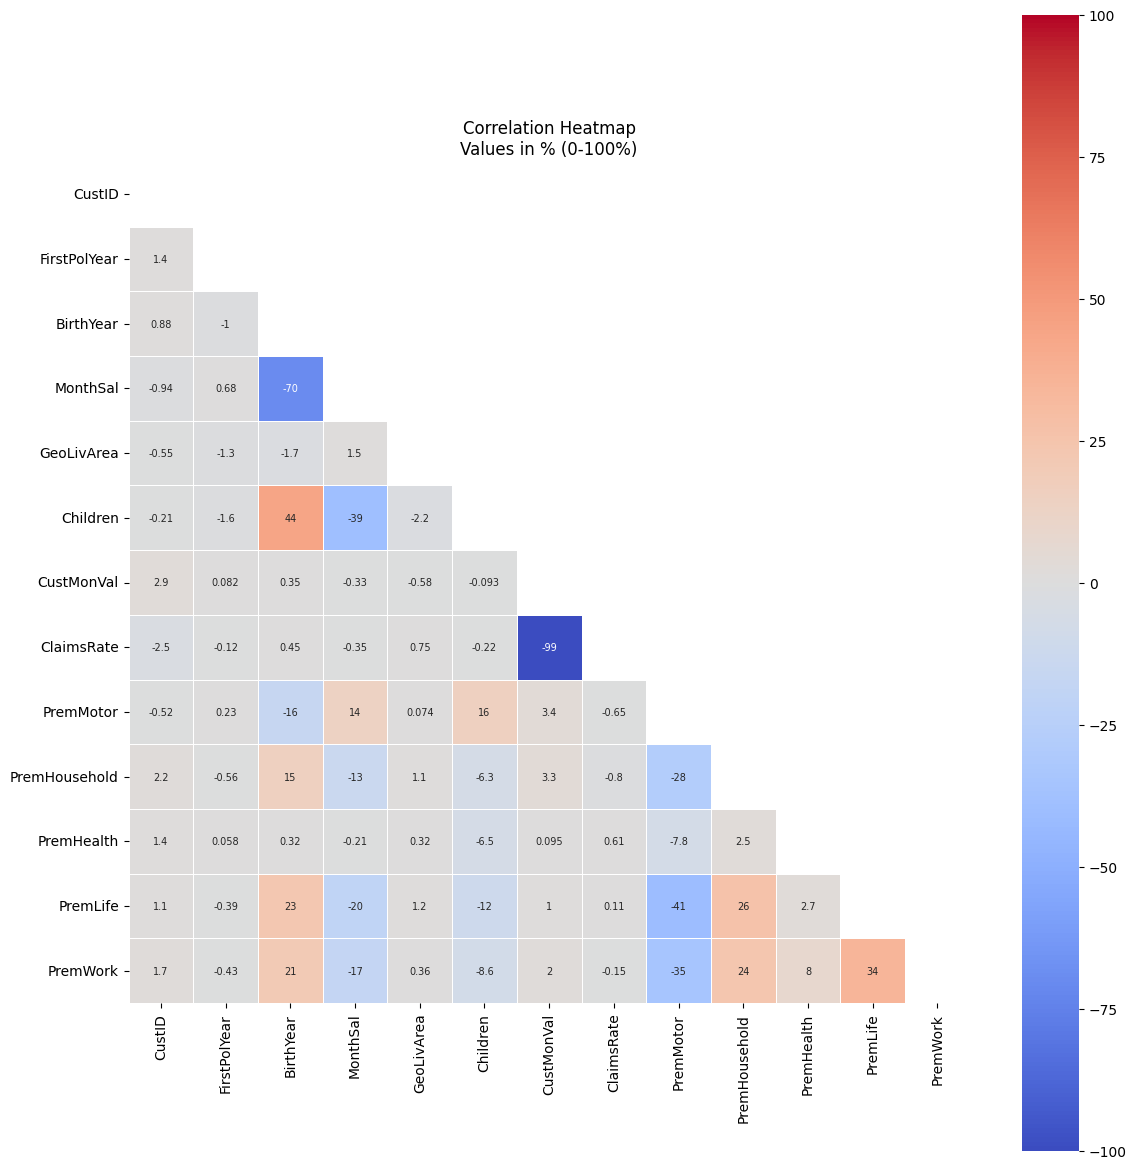

In [13]:
# adapted from code from class
corr = ds.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12))
heatmap = sns.heatmap(corr*100,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -100,
                      vmax = 100,
                      annot = True,
                      annot_kws = {'size': 7})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('Correlation Heatmap\nValues in % (0-100%)')
plt.tight_layout() # avoid overlaping of axis labels

Comments:
- The ClaimsRate variable has a very high negative correlation with the CustMonVal (-99%), which makes sense since the profit from each customer is negatively correlated with the amount paid by the insurance company. This should be taken into account and in the Data Preparation Section, we should decide to remove one of them since this very high correlation could undermine the clustering.
- It is also worth noticing that the Monthly Salary (MonthSal) also has a high negative correlation (-70%) with the year of birth (BirthYear), which means that, on average, older people earn more. However, since income and age are two classical customer segmentation factors, we think it does not make sense to remove any of them.

### Analysis of Presence in Business Segments

In this section, we want to analyse whether customers are present in more than one business segment (motor, life, health insurance etc.) or not.

In [14]:
# Analysing how many customers are not present in each business segment (Premium=0 or NA)

# listing "Prem" Variables
seg_premiums = [var for var in ds.columns if "Prem" in var]

pbs = dict() # initialize dictionary to store presence in business segment (pbs) information

for var in seg_premiums:
    # get business segment name by removing "Prem" from the variable name
    bseg = var.replace("Prem", "")
    # we will assume that missing values also correspond to the customer not having a policy in that business segment
    pbs[bseg] = [(ds[var]==0).sum() + ds[var].isnull().sum()]

# transform dictionary into dataframe to present results in table
pbs_df = pd.DataFrame(pbs, index=["Customers not Present"]).T.rename_axis("Business Segment")
pbs_df

,Customers not Present
Business Segment,
Motor,34
Household,60
Health,43
Life,104
Work,86


In [15]:
cnp = pbs_df.iloc[:,0].sum() # sum customers not present across all business segments
r_cnp = cnp/nobs # ratio of customers not present
print("In a dataset with more than "+str(nobs)+" observations,"
      +" at most "+str(cnp)+" customers "+"({pct}%)".format(pct=round(r_cnp*100,1))
      +" are not present in at least one business segment.")

In a dataset with more than 10192 observations, at most 327 customers (3.2%) are not present in at least one business segment.


Comments:
- Most customers are present in all business segments (LOB), so an analysis of customers by business segment (such as trying to differentiate between which customers are present in each business segment) does not make sense in this case.
- This can also mean that our dataset might precisely consist on the customers that have product subscriptions across all lines of business or a majority of it.

###  Analysis of Categorical Variables

In [16]:
# listing categorical variables
categoricals = ["GeoLivArea", "Children", "EducDeg"]

#### Value Counts

GEOLIVAREA



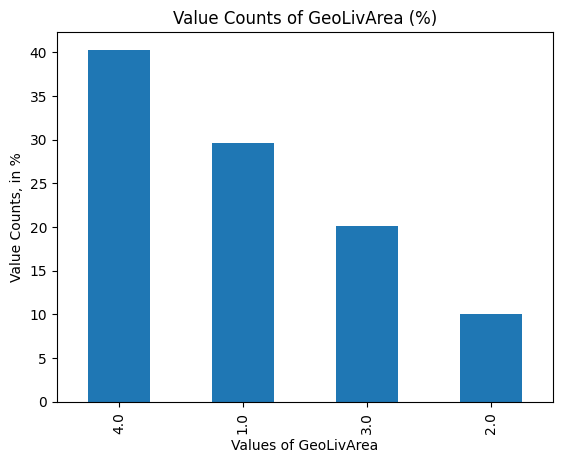

,GeoLivArea,%
4.0,4145,40.3
1.0,3048,29.6
3.0,2066,20.1
2.0,1036,10.1




CHILDREN



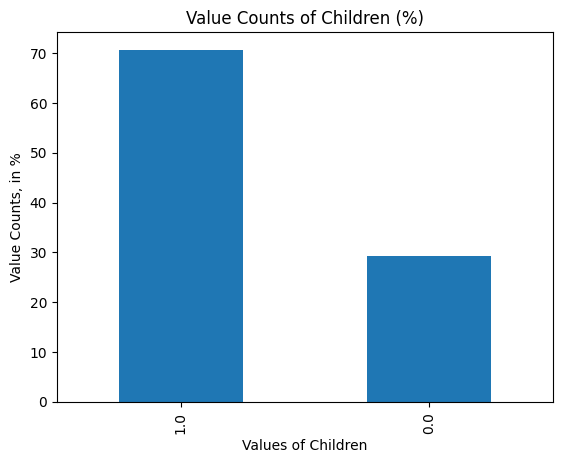

,Children,%
1.0,7262,70.7
0.0,3013,29.3




EDUCDEG



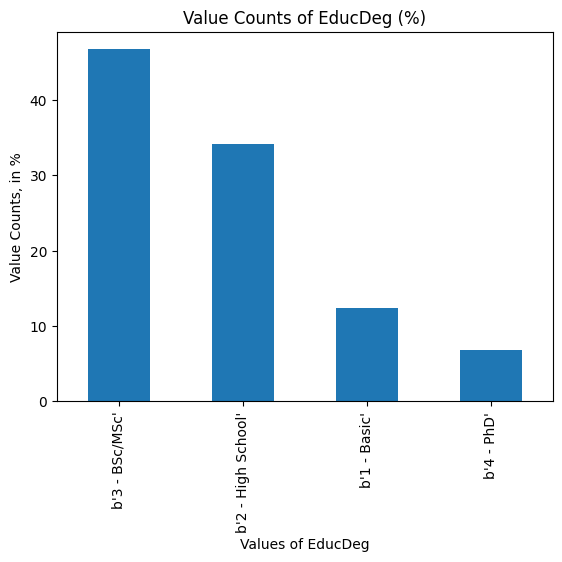

,EducDeg,%
b'3 - BSc/MSc',4799,46.7
b'2 - High School',3510,34.1
b'1 - Basic',1272,12.4
b'4 - PhD',698,6.8


In [17]:
# display value counts in absolute and in relative value form for each categorical variable
# both in table and grahical formats
for var in categoricals:
    
    print(var.upper()+'\n') # Print Variable name in all caps
    
    # make table with value counts in absolute and relative values
    # store table in temporary df
    df_temp = pd.concat([pd.DataFrame(ds[var].value_counts()),
                         (100*pd.DataFrame(ds[var].value_counts(normalize=True))).round(1)], # show value in %, rounded to 1 dec case
                        axis=1)
    # rename percentage column to signal percentage (%)
    df_temp.columns = [df_temp.columns[0], "%"]
    
    # plot bar chart of percentages
    df_temp["%"].plot(kind='bar',title="Value Counts of "+var+" (%)",
                      xlabel="Values of "+var, ylabel="Value Counts, in %")
    plt.show() # force plot in each iteration
    
    # show table
    display(df_temp) # display the df
    
    print("\n") # give space between variables

#### Cross Tables and Charts

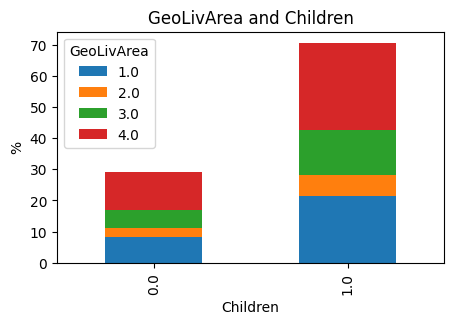

Children,0.0,1.0
GeoLivArea,,
1.0,8.3,21.4
2.0,3.0,6.9
3.0,5.7,14.4
4.0,12.3,28.0


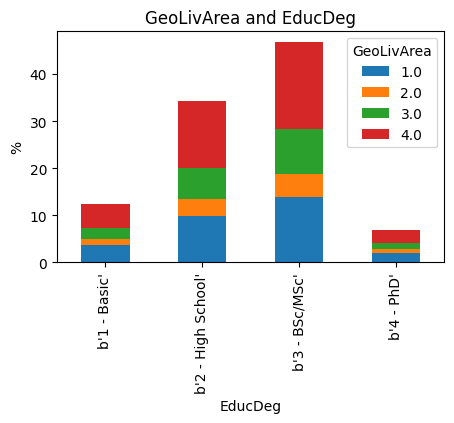

EducDeg,b'1 - Basic',b'2 - High School',b'3 - BSc/MSc',b'4 - PhD'
GeoLivArea,,,,
1.0,3.7,9.9,14.0,2.1
2.0,1.2,3.5,4.7,0.7
3.0,2.5,6.6,9.6,1.4
4.0,5.0,14.2,18.4,2.6


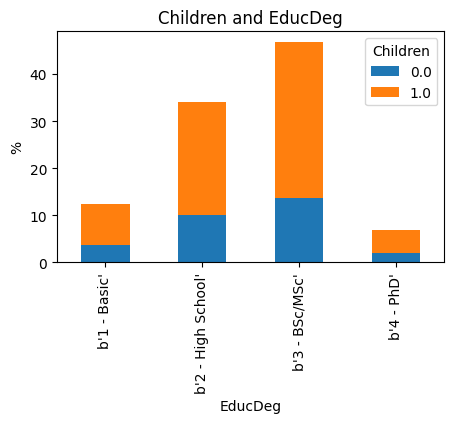

EducDeg,b'1 - Basic',b'2 - High School',b'3 - BSc/MSc',b'4 - PhD'
Children,,,,
0.0,3.7,10.0,13.6,2.0
1.0,8.7,24.1,33.1,4.8


In [18]:
# cross tables and stacked bars for every combination of categorical variables
for i in range(len(categoricals)): # nested loop to get all combinations of categorical variables
    cat = categoricals
    for j in range(i+1, len(categoricals)):
        c1, c2 = cat[i], cat[j]
        tb = (100*pd.crosstab(index=ds[c1], columns=ds[c2], normalize=True)).round(1)
        print()
        # code from class
        # Visual exploration of the cross table
        tb.T.plot(kind="bar", figsize=(5,3), stacked=True, title=c1+' and '+c2, ylabel='%')
        plt.show()
        display(tb)

### Analysis of Values of Numerical Variables 

In this section, we want to analyse the distribution between negative, positive and zero values for all numerical variables.

In [19]:
# first, get a table with the number of observations for each variable
nva = {"Variable": numericals, "Total": ds[numericals].count().values}
nva_df = pd.DataFrame(nva).set_index("Variable")

nva_df = pd.concat([nva_df, # dataframe with totals of numerical variables
                    # then get a dataframe with the counts of negative, zero and positive values for all numerical values in ds
                    ds[numericals].apply(lambda x: pd.Series([sum(x < 0), sum(x == 0), sum(x > 0)],
                                                             index=['Negative', 'Zero', 'Positive'])).T],
                    axis=1 # concatenate along columns
                  )
nva_df

,Total,Negative,Zero,Positive
CustID,10296,0,0,10296
FirstPolYear,10266,0,0,10266
BirthYear,10279,0,0,10279
MonthSal,10260,0,0,10260
GeoLivArea,10295,0,0,10295
Children,10275,0,3013,7262
CustMonVal,10296,2768,2,7526
ClaimsRate,10296,0,58,10238
PremMotor,10262,1,0,10261
PremHousehold,10296,1097,60,9139


Comments:
- In general there are not many zeroes (Children is a dummy variable, so it makes sense to have zero values)
- Even the Claims Rate only has 58 zero values, which indicates that almost all customers had at least a claim in the last two years
- The Premiums variables have some negative values, with a number of occurences that is too high to disregard (tipicaly >6.6%, with the exception of Motor and Household LOBs)

## Data Preparation

In [20]:
X = ds.copy() # make changes in a copy of the original dataframe

In [21]:
X.describe(include='all').T # describe to help treating the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10296.0,NaN,NaN,NaN,5148.5,2972.34352,1.0,2574.75,5148.5,7722.25,10296.0
FirstPolYear,10266.0,NaN,NaN,NaN,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.0,53784.0
BirthYear,10279.0,NaN,NaN,NaN,1968.007783,19.709476,1028.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10279,4,b'3 - BSc/MSc',4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10260.0,NaN,NaN,NaN,2506.667057,1157.449634,333.0,1706.0,2501.5,3290.25,55215.0
GeoLivArea,10295.0,NaN,NaN,NaN,2.709859,1.266291,1.0,1.0,3.0,4.0,4.0
Children,10275.0,NaN,NaN,NaN,0.706764,0.455268,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10262.0,NaN,NaN,NaN,300.470252,211.914997,-4.11,190.59,298.61,408.3,11604.42


### Check Duplicates
By ID

In [22]:
X['CustID'].duplicated().any()

False

No duplicated IDs, so we'll assume there are no duplicates in the data set.

### Missing Values

In [23]:
# Check missing values
print(X.isnull().sum()) # before

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64


For the FirstPolYear, BirthYear, EducDeg, EducDeg, MonthSal, GeoLivArea, Children variables, we will remove the observations since they are only a few.

In [24]:
X = X.dropna(subset=['FirstPolYear', 'BirthYear', 'EducDeg', 'EducDeg', 'MonthSal', 'GeoLivArea', 'Children'])
print(X.isnull().sum()) # after removal of nas for above vars

CustID             0
FirstPolYear       0
BirthYear          0
EducDeg            0
MonthSal           0
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         31
PremHousehold      0
PremHealth        40
PremLife         103
PremWork          84
dtype: int64


For the premium variables, we will assume that a missing value represents no premium (zero).

In [25]:
# see number of zeros before
for var in [c for c in X.columns if 'Prem' in c]:
    print(var, (X[var]==0).sum())

PremMotor 0
PremHousehold 39
PremHealth 0
PremLife 0
PremWork 0


In [26]:
# replace missing values by zero
for var in [c for c in X.columns if 'Prem' in c]:
    X[var] = X[var].fillna(0)
    print(var, (X[var]==0).sum()) # print number of zeros per variable after

PremMotor 31
PremHousehold 39
PremHealth 40
PremLife 103
PremWork 84


Number of zeros increased by the number of missing values, so it seems to be successfully done.

In [27]:
# Check missing values after
print(X.isnull().sum())

CustID           0
FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64


No missing values.

In [28]:
# check description of df after
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10204.0,NaN,NaN,NaN,5150.544296,2972.498656,1.0,2575.75,5151.5,7723.25,10296.0
FirstPolYear,10204.0,NaN,NaN,NaN,1991.104567,512.818396,1974.0,1980.0,1986.0,1992.0,53784.0
BirthYear,10204.0,NaN,NaN,NaN,1968.014798,19.7242,1028.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10204,4,b'3 - BSc/MSc',4767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10204.0,NaN,NaN,NaN,2506.001176,1158.584391,333.0,1705.0,2500.0,3291.0,55215.0
GeoLivArea,10204.0,NaN,NaN,NaN,2.712564,1.266736,1.0,1.0,3.0,4.0,4.0
Children,10204.0,NaN,NaN,NaN,0.706684,0.455304,0.0,0.0,1.0,1.0,1.0
CustMonVal,10204.0,NaN,NaN,NaN,177.852143,1954.449732,-165680.42,-9.3575,187.09,399.86,11875.89
ClaimsRate,10204.0,NaN,NaN,NaN,0.743317,2.929903,0.0,0.39,0.72,0.98,256.2
PremMotor,10204.0,NaN,NaN,NaN,299.483885,212.780199,-4.11,190.26,298.39,407.52,11604.42


After dealing with missing values, we stay with 10204 observations across all variables. So, we lost: 10296 (maximum from initial dataset) - 10204 (after dealing with missing values) = 92, or about 0.9% of the initial observations, which seems ok.

### Outliers / Data errors

#### FirstPolYear
For the FirstPolYear variable we will see how many observations have a value higher than the current year of the dataset (2016), which should be a data error since this is impossible.

In [29]:
X[X.FirstPolYear>current_year]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
9294,9295.0,53784.0,1948.0,b'3 - BSc/MSc',3268.0,1.0,0.0,348.85,0.37,351.4,15.0,187.37,22.45,17.78


There is only 1 obs. in this situation, so remove it.

In [30]:
X = X[X.FirstPolYear<=current_year]
X.describe(include='all').T #check new df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10203.0,NaN,NaN,NaN,5150.138097,2972.361104,1.0,2575.5,5151.0,7722.5,10296.0
FirstPolYear,10203.0,NaN,NaN,NaN,1986.028325,6.609155,1974.0,1980.0,1986.0,1992.0,1998.0
BirthYear,10203.0,NaN,NaN,NaN,1968.01676,19.724172,1028.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10203,4,b'3 - BSc/MSc',4766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10203.0,NaN,NaN,NaN,2505.926492,1158.616608,333.0,1705.0,2500.0,3291.0,55215.0
GeoLivArea,10203.0,NaN,NaN,NaN,2.712732,1.266685,1.0,1.0,3.0,4.0,4.0
Children,10203.0,NaN,NaN,NaN,0.706753,0.455273,0.0,0.0,1.0,1.0,1.0
CustMonVal,10203.0,NaN,NaN,NaN,177.835384,1954.544784,-165680.42,-9.385,187.04,399.86,11875.89
ClaimsRate,10203.0,NaN,NaN,NaN,0.743354,2.930045,0.0,0.39,0.72,0.98,256.2
PremMotor,10203.0,NaN,NaN,NaN,299.478796,212.790007,-4.11,190.26,298.39,407.52,11604.42


Next in our analysis of the FirstPolYear, we want to quantify the number of cases in which FirstPolYear < BirthYear, which should also be an impossibility.

In [31]:
# see cases of FirstPolYear < BirthYear
X[X.FirstPolYear<X.BirthYear]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
13,14.0,1983.0,2000.0,b'1 - Basic',1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
18,19.0,1981.0,1982.0,b'1 - Basic',1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57
22,23.0,1976.0,1986.0,b'2 - High School',1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90
40,41.0,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,10269.0,1987.0,1988.0,b'3 - BSc/MSc',1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.46
10273,10274.0,1989.0,1992.0,b'2 - High School',1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.12
10284,10285.0,1980.0,1987.0,b'3 - BSc/MSc',1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,0.00
10288,10289.0,1982.0,1993.0,b'2 - High School',1465.0,1.0,1.0,795.15,0.35,67.79,820.15,102.13,182.48,86.46


Comments:
- There are around 1982 observations where the First Policy Year is inferior to the birth year, which does not make sense. However, since the number of cases is way too big (almost 20% of the dataset) we shouldn't outright remove all this observations.
- Because it has such a high number of occurences, this is most likely a special case where for instance the persons were once included in their parents policy and "inherited" their parents First Policy Year.
- We will deal with this later on when we transform these variables into age/time since first policy.

#### BirthYear
For the BirthYear variable, the max year is 2001, which is less than the current year (2016), so it is ok. However the minimum value is 1028, which is clearly impossible and then again a data error. Thus, we'll analyse the values which are less than 1916 (or people with more than 100 years).

In [32]:
X[X.BirthYear<1916]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
7195,7196.0,1993.0,1028.0,b'3 - BSc/MSc',2830.0,4.0,0.0,146.02,0.77,428.97,192.8,108.91,1.89,23.67


Since it is only one observation, we will remove it.

In [33]:
X = X[X.BirthYear>1028]
X.describe(include='all').T #check new df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10202.0,NaN,NaN,NaN,5149.937561,2972.437766,1.0,2575.25,5150.5,7722.75,10296.0
FirstPolYear,10202.0,NaN,NaN,NaN,1986.027642,6.609118,1974.0,1980.0,1986.0,1992.0,1998.0
BirthYear,10202.0,NaN,NaN,NaN,1968.1089,17.391105,1935.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10202,4,b'3 - BSc/MSc',4765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10202.0,NaN,NaN,NaN,2505.894727,1158.668953,333.0,1705.0,2500.0,3291.0,55215.0
GeoLivArea,10202.0,NaN,NaN,NaN,2.712605,1.266683,1.0,1.0,3.0,4.0,4.0
Children,10202.0,NaN,NaN,NaN,0.706822,0.455242,0.0,0.0,1.0,1.0,1.0
CustMonVal,10202.0,NaN,NaN,NaN,177.838502,1954.640558,-165680.42,-9.4125,187.09,399.86,11875.89
ClaimsRate,10202.0,NaN,NaN,NaN,0.743351,2.930188,0.0,0.39,0.72,0.98,256.2
PremMotor,10202.0,NaN,NaN,NaN,299.466104,212.796574,-4.11,190.26,298.335,407.52,11604.42


For the remaining variables, there are no obvious data errors, based on min/max analysis of the table above, so we will try to identify outliers by visual inspection of the boxplots.

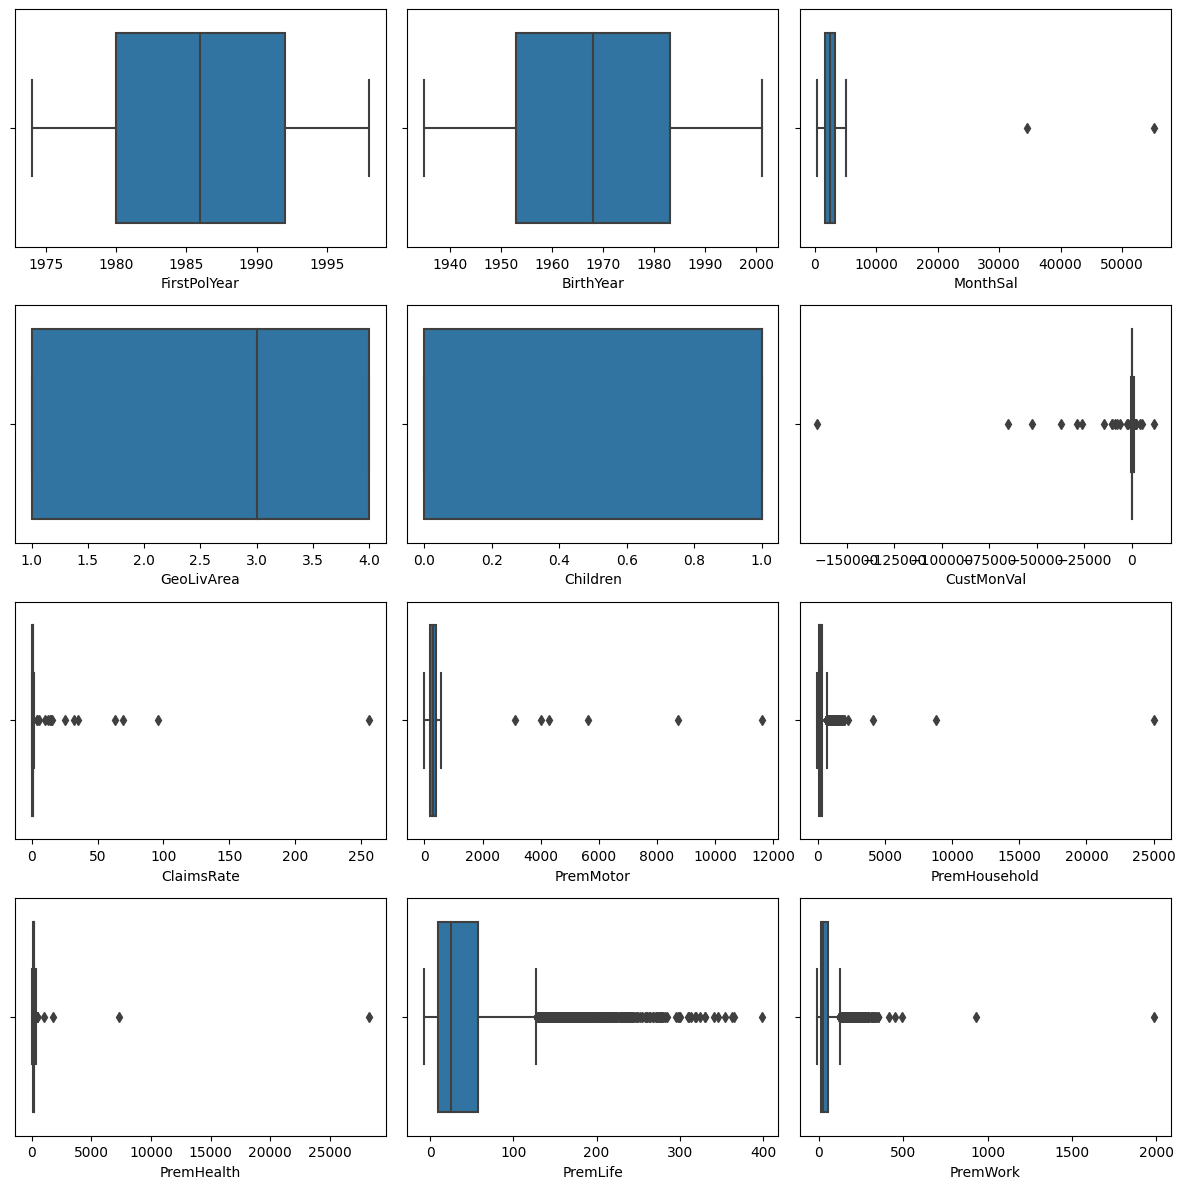

In [34]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(4, 3, figsize=(12, 12))
for var, subplot in zip(X[numericals[1:]], ax.flatten()):
    sns.boxplot(x=X[var], ax=subplot)
plt.tight_layout()

In [35]:
numericals[1:]

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'GeoLivArea',
 'Children',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

#### MonthSal
For the MonthSal, the outliers seem to be above 20000

In [36]:
X[X.MonthSal>=20000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
5882,5883.0,1995.0,1956.0,b'2 - High School',55215.0,4.0,1.0,122.25,0.79,281.83,147.25,130.58,84.46,66.68
8261,8262.0,1981.0,1991.0,b'2 - High School',34490.0,4.0,0.0,608.89,0.28,57.01,358.95,195.26,113.80,161.14


Only two observations, so remove them.

In [37]:
X = X[X.MonthSal<20000]

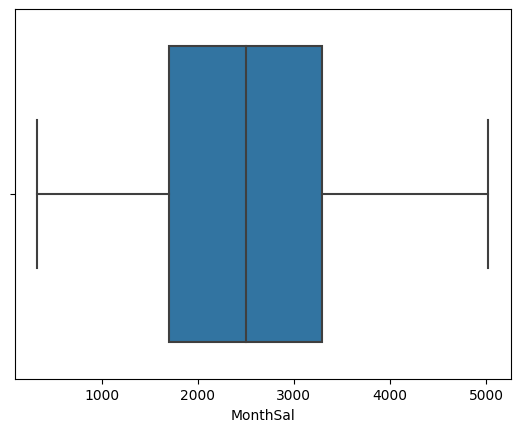

In [38]:
# plotting the boxplot again
sns.boxplot(x=X["MonthSal"]); #seems much better, without outliers

#### CustMonVal
For the CustMonVal variable the ouliers seem to be below -20000.

In [39]:
X[X.CustMonVal<=-20000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
171,172.0,1990.0,1989.0,b'3 - BSc/MSc',1086.0,4.0,1.0,-165680.42,256.2,378.07,78.90,166.81,6.89,18.45
655,656.0,1974.0,1963.0,b'3 - BSc/MSc',3279.0,3.0,1.0,-64891.00,96.0,410.30,117.25,95.35,37.34,22.56
675,676.0,1994.0,1937.0,b'2 - High School',4435.0,1.0,0.0,-52382.76,63.0,197.48,280.60,276.94,51.12,38.34
707,708.0,1991.0,1991.0,b'3 - BSc/MSc',1634.0,1.0,1.0,-28945.40,35.0,175.70,319.50,294.39,44.12,16.89
917,918.0,1986.0,1952.0,b'2 - High School',3355.0,4.0,0.0,-26130.45,32.3,135.58,290.05,221.82,86.46,100.13
9648,9649.0,1990.0,1950.0,b'3 - BSc/MSc',3574.0,3.0,0.0,-37327.08,69.0,319.06,-25.55,245.38,4.89,4.78


Only 6 observations, so remove them.

In [40]:
X = X[X.CustMonVal>-20000]

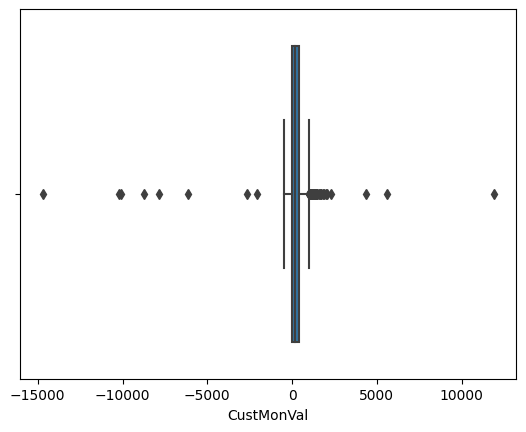

In [41]:
# plotting the boxplot again
sns.boxplot(x=X["CustMonVal"]); 

There seems to be yet some outliers with regards to this variable, on the left for obs <= -2000, on the right some more which we will analyse afterwards.

In [42]:
X[X.CustMonVal<=-2000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
51,52.0,1982.0,1966.0,b'3 - BSc/MSc',3234.0,4.0,1.0,-14714.08,25.36,557.44,20.00,29.56,5.00,-9.00
112,113.0,1997.0,1979.0,b'4 - PhD',2354.0,1.0,1.0,-8719.04,15.65,518.32,4.45,55.90,3.89,10.89
135,136.0,1997.0,1988.0,b'3 - BSc/MSc',2176.0,4.0,1.0,-10198.91,14.80,297.61,162.80,143.36,136.47,-3.00
758,759.0,1988.0,1992.0,b'3 - BSc/MSc',1117.0,1.0,1.0,-10107.37,12.60,193.37,342.85,276.94,8.78,47.23
793,794.0,1980.0,1983.0,b'3 - BSc/MSc',1370.0,3.0,1.0,-7851.17,13.90,127.58,48.35,398.41,19.56,12.78
951,952.0,1998.0,1976.0,b'3 - BSc/MSc',1586.0,3.0,1.0,-2642.91,5.60,501.65,-20.00,90.46,-1.00,-2.00
982,983.0,1989.0,1981.0,b'2 - High School',1771.0,3.0,1.0,-6115.85,9.87,83.35,98.35,336.84,74.68,93.46
1025,1026.0,1988.0,1939.0,b'3 - BSc/MSc',4566.0,1.0,1.0,-2082.83,4.36,370.07,14.45,189.59,14.78,23.56


Only 8 observations, so remove them.

In [43]:
X = X[X.CustMonVal>-2000]

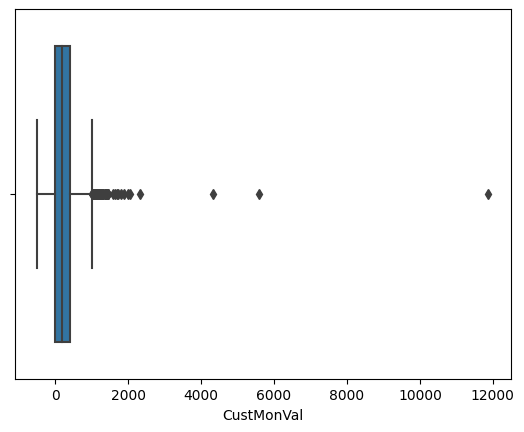

In [44]:
# plotting the boxplot again
sns.boxplot(x=X["CustMonVal"]); 

On the left there seems to be no outliers. On the right, there seem to be some outliers for values above around 1000.

In [45]:
X[X.CustMonVal>=1000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
257,258.0,1991.0,1995.0,b'3 - BSc/MSc',380.0,1.0,0.0,1105.42,0.21,50.90,1012.40,221.93,10.78,128.80
265,266.0,1997.0,1990.0,b'3 - BSc/MSc',881.0,1.0,1.0,1160.88,0.00,163.92,727.35,151.25,66.68,76.68
301,302.0,1976.0,1991.0,b'1 - Basic',1497.0,1.0,0.0,1356.71,0.05,41.23,1089.10,69.68,101.24,150.14
476,477.0,1977.0,1959.0,b'2 - High School',3067.0,2.0,1.0,1003.64,0.00,212.04,549.55,96.35,65.79,104.91
600,601.0,1986.0,1991.0,b'1 - Basic',789.0,1.0,1.0,1033.08,0.00,140.47,560.10,247.49,11.89,98.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,9798.0,1994.0,1993.0,b'2 - High School',1096.0,4.0,0.0,1367.61,0.11,46.01,1255.25,129.69,122.58,14.78
10131,10132.0,1977.0,1997.0,b'1 - Basic',986.0,3.0,1.0,1200.44,0.11,67.79,958.50,79.46,33.34,233.60
10228,10229.0,1978.0,1996.0,b'2 - High School',844.0,3.0,0.0,1041.42,0.25,51.01,1045.75,247.27,53.90,20.67
10230,10231.0,1991.0,1996.0,b'1 - Basic',1594.0,3.0,0.0,1083.11,0.14,42.34,877.40,135.58,89.35,141.36


There are 101 observations above 1000 of CustMonVal, which seems too much to remove. So we will remove only the more extreme outliers which seem to be the top 4 and probably aggregate the rest of them in the top bin for this variable that we will do later on.

In [46]:
X.nlargest(4,"CustMonVal")

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
5293,5294.0,1989.0,1963.0,b'3 - BSc/MSc',3564.0,3.0,1.0,11875.89,0.09,11604.42,48.90,1045.52,103.13,296.47
7085,7086.0,1992.0,1963.0,b'3 - BSc/MSc',2460.0,3.0,1.0,5596.84,0.01,5645.50,-25.55,49.01,1.89,1.89
6701,6702.0,1995.0,1951.0,b'3 - BSc/MSc',2947.0,4.0,0.0,4328.50,0.03,4273.49,83.90,105.13,3.00,3.89
5084,5085.0,1994.0,1959.0,b'2 - High School',3330.0,3.0,0.0,2314.21,0.14,350.51,201.70,125.80,39.23,1988.70


In [47]:
# remove those top observations/outliers
X = X[X.CustMonVal<2314.2]

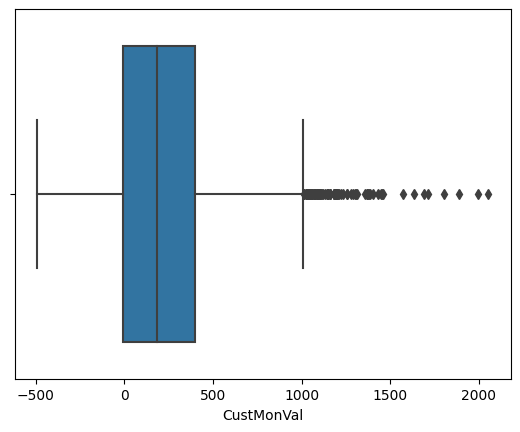

In [48]:
# plotting the boxplot again
sns.boxplot(x=X["CustMonVal"]); 

#### ClaimsRate

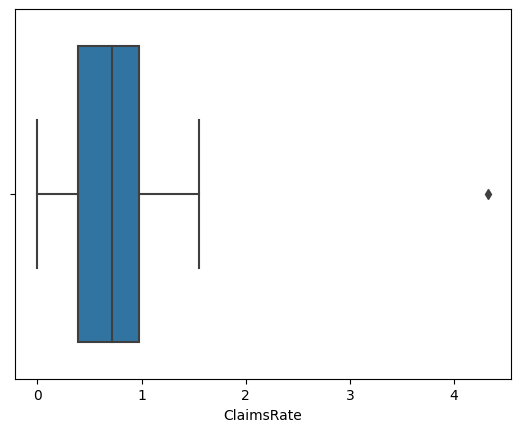

In [49]:
# plotting the boxplot again
sns.boxplot(x=X["ClaimsRate"]); 

For the claims rate, only one outlier seems to last, which probably is due to the removal of the negative outliers of the CustMonVal variable.

In [50]:
X[X.ClaimsRate>2]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
7962,7963.0,1975.0,1988.0,b'4 - PhD',1868.0,1.0,1.0,-56.1,4.33,0.0,-15.55,0.0,12.89,12.0


Only 1 observation, so remove it.

In [51]:
X = X[X.ClaimsRate<=2]

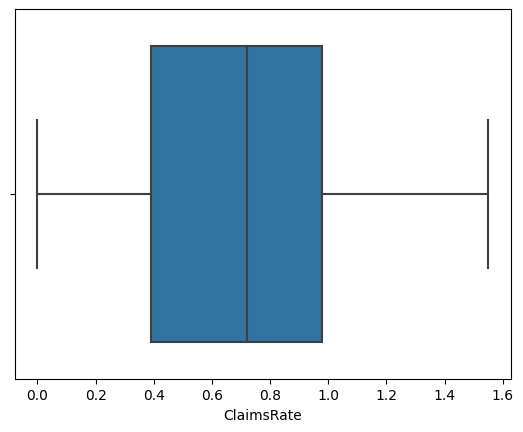

In [52]:
# plotting the boxplot again
sns.boxplot(x=X["ClaimsRate"]); # no outliers now

#### PremMotor

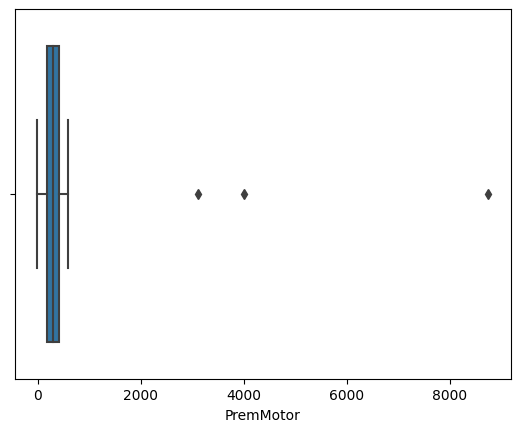

In [53]:
# plotting the boxplot again
sns.boxplot(x=X["PremMotor"]); 

For the PremMotor variable, there seems to be only 3 outliers, above the 2000 value.

In [54]:
X[X.PremMotor>2000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
5128,5129.0,1996.0,1943.0,b'1 - Basic',3763.0,1.0,0.0,466.21,0.90,4003.44,612.9,137.36,121.69,31.34
5211,5212.0,1981.0,1943.0,b'2 - High School',4135.0,3.0,0.0,130.14,0.99,8744.61,101.7,1767.00,155.14,130.58
7904,7905.0,1974.0,1959.0,b'3 - BSc/MSc',2354.0,4.0,1.0,-46.89,1.01,3106.62,30.0,59.01,12.89,9.00


Only 3 observations, so remove them.

In [55]:
X = X[X.PremMotor<=2000]

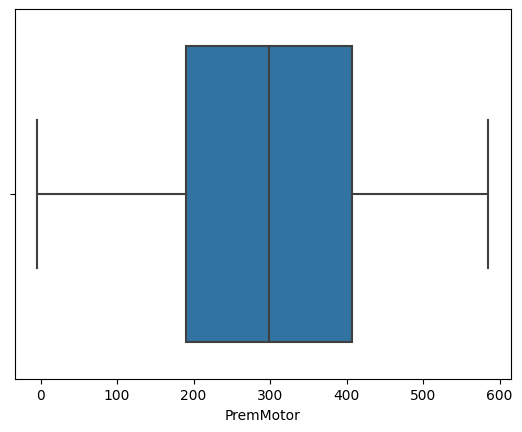

In [56]:
# plotting the boxplot again
sns.boxplot(x=X["PremMotor"]); # no outliers now

#### PremHousehold

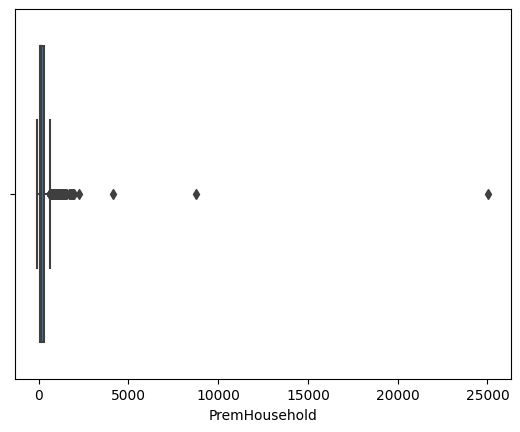

In [57]:
# plotting the boxplot again
sns.boxplot(x=X["PremHousehold"]); 

The PremHousehold variable has some outliers. Let's take a look at values above 2000.

In [58]:
X[X.PremHousehold>=2000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
6343,6344.0,1981.0,1949.0,b'2 - High School',2642.0,2.0,1.0,0.78,0.99,424.19,4130.70,118.69,15.67,41.45
6835,6836.0,1975.0,1966.0,b'3 - BSc/MSc',2832.0,4.0,1.0,-31.00,1.00,535.10,8762.80,41.12,-6.00,9.78
8425,8426.0,1976.0,1996.0,b'1 - Basic',427.0,3.0,1.0,-61.34,1.02,16.67,2223.75,37.45,36.34,67.79
8866,8867.0,1978.0,1972.0,b'2 - High School',2618.0,4.0,1.0,473.54,0.98,508.43,25048.80,36.23,9.89,11.89


Only 4 observations, so remove them.

In [59]:
X = X[X.PremHousehold<2000]

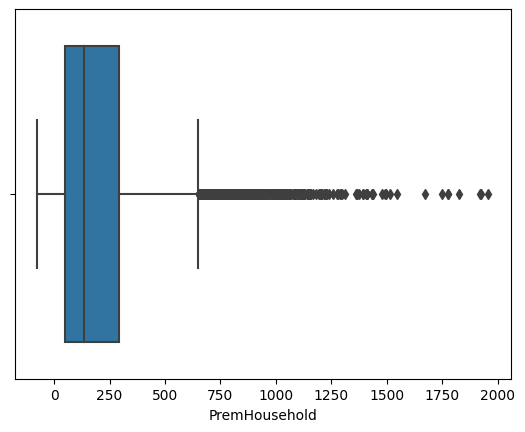

In [60]:
# plotting the boxplot again
sns.boxplot(x=X.PremHousehold); # less extreme outliers now

There seem to be yet a lot of outliers. Let's take a look at how many observations are above the 650 level.

In [61]:
X[X.PremHousehold>650]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
108,109.0,1991.0,1995.0,b'1 - Basic',764.0,4.0,1.0,71.24,0.93,79.68,912.95,97.24,213.04,16.56
127,128.0,1978.0,1952.0,b'2 - High School',3481.0,3.0,0.0,-19.11,1.00,132.58,750.15,168.70,71.79,65.90
152,153.0,1981.0,1989.0,b'2 - High School',1753.0,4.0,0.0,10.34,0.97,125.80,785.70,79.57,136.47,101.13
186,187.0,1993.0,1999.0,b'1 - Basic',1247.0,2.0,1.0,-128.24,1.07,33.23,1026.30,82.57,75.68,212.15
202,203.0,1989.0,1960.0,b'3 - BSc/MSc',2544.0,4.0,1.0,183.26,0.84,163.03,927.40,159.92,45.23,34.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,10231.0,1991.0,1996.0,b'1 - Basic',1594.0,3.0,0.0,1083.11,0.14,42.34,877.40,135.58,89.35,141.36
10287,10288.0,1996.0,1941.0,b'2 - High School',3845.0,4.0,0.0,99.47,0.90,87.35,843.50,121.58,157.92,33.45
10288,10289.0,1982.0,1993.0,b'2 - High School',1465.0,1.0,1.0,795.15,0.35,67.79,820.15,102.13,182.48,86.46
10290,10291.0,1994.0,1999.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26


There are a still a lot of outliers above the 650 level, around 625 observations, which seems too much to remove. So similarly to the CustMonVal variable, we removed only the more extreme outliers will aggregate the remaining with binning.

#### PremHealth

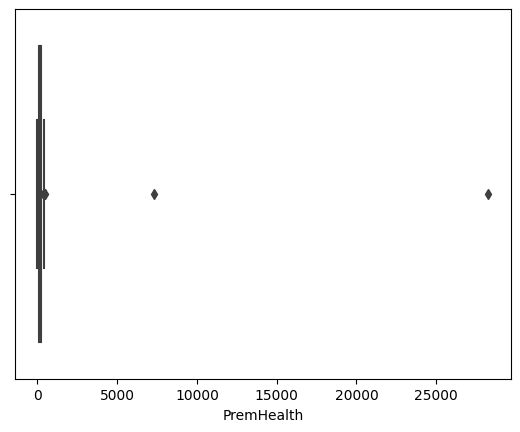

In [62]:
# plotting the boxplot again
sns.boxplot(x=X["PremHealth"]); 

At a first glance, there seems to be 2 very extreme outliers, above the 5000 level. Let's take a look at them.

In [63]:
X[X.PremHealth>5000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
7961,7962.0,1995.0,1942.0,b'3 - BSc/MSc',4002.0,3.0,0.0,1457.99,0.83,431.86,107.80,7322.48,12.89,930.44
9149,9150.0,1985.0,1994.0,b'2 - High School',987.0,3.0,1.0,804.05,0.97,26.34,829.05,28272.00,65.68,138.25


Only 2 observations, so remove them.

In [64]:
X = X[X.PremHealth<=5000]

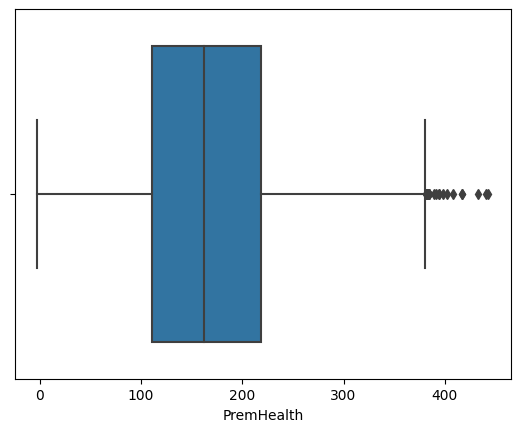

In [65]:
# let's take a look at the boxplot again
sns.boxplot(x=X["PremHealth"]); 

Only 3 more extreme outliers seem to remain. Let's take a look at them.

In [66]:
X.nlargest(3,"PremHealth")

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
2009,2010.0,1989.0,1981.0,b'3 - BSc/MSc',1973.0,4.0,1.0,219.50,0.71,74.79,288.95,442.86,27.56,16.89
524,525.0,1986.0,1939.0,b'3 - BSc/MSc',4056.0,2.0,0.0,16.91,0.93,64.68,13.35,440.86,28.56,30.23
1112,1113.0,1989.0,1991.0,b'2 - High School',1927.0,1.0,1.0,102.24,0.81,72.46,98.90,432.97,28.34,34.45


Since these 3 observations seem to be farther aparte from the other and they only 3 we will also remove. As for the remaining one, we will most likely aggregating them with some binngin later on.

In [67]:
X = X[X.PremHealth<=432]

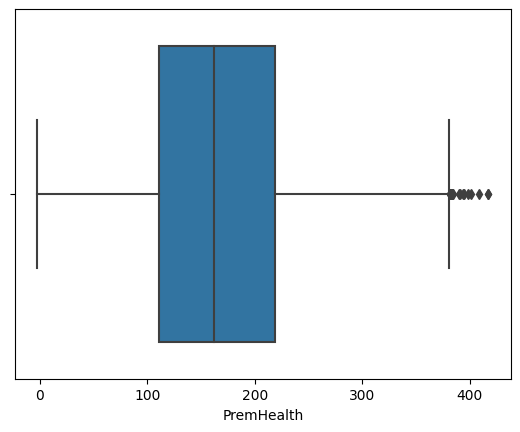

In [68]:
# final look at the boxplot
sns.boxplot(x=X["PremHealth"]); # no extreme outliers 

In [69]:
X[X.PremHealth>380].count()[0] # above 380 still 20, which starts to be some, so we did not remove more

20

#### PremLife

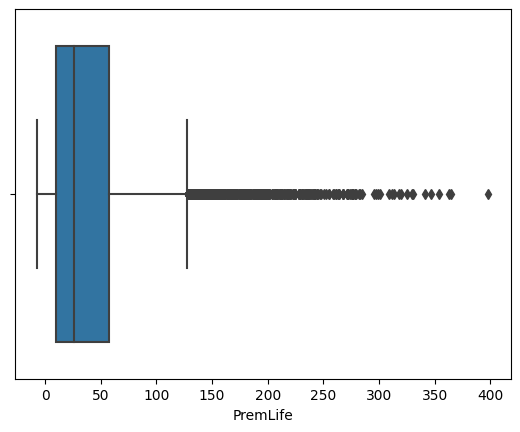

In [70]:
# start by taking a look at the boxplot again
sns.boxplot(x=X["PremLife"]); 

From the boxplot above there seems to be a lot of outliers, although not many of them extreme. Let's take a look at the observations above 350.

In [71]:
X[X.PremLife>350]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1301,1302.0,1991.0,1997.0,b'1 - Basic',626.0,1.0,1.0,372.74,0.45,43.34,175.6,122.58,354.40,28.56
2422,2423.0,1986.0,1995.0,b'1 - Basic',1405.0,4.0,1.0,481.20,0.50,56.79,506.2,71.79,363.29,18.78
3484,3485.0,1992.0,1996.0,b'2 - High School',1696.0,4.0,0.0,535.22,0.63,161.92,593.4,310.17,398.30,50.23
7307,7308.0,1983.0,1993.0,b'2 - High School',1242.0,3.0,0.0,500.21,0.47,49.01,476.2,70.79,365.18,21.78


Only the top 3 observations above 360 seem more extreme, so remove them.

In [72]:
X = X[X.PremLife<=360]

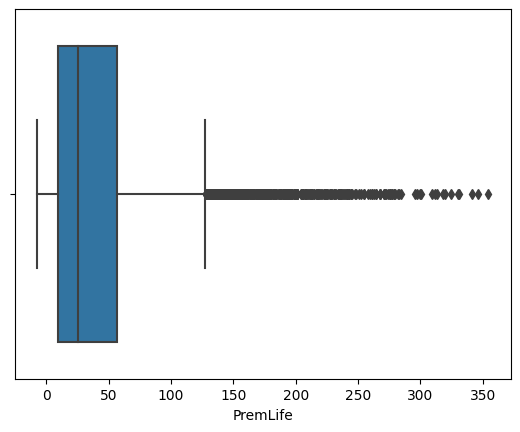

In [73]:
# take a look at the boxplot again
sns.boxplot(x=X["PremLife"]); 

There's still a lot of outliers, but too many to remove. Let's see at how many above 130.

In [74]:
X[X.PremLife>130]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
13,14.0,1983.0,2000.0,b'1 - Basic',1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
40,41.0,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
44,45.0,1985.0,1990.0,b'3 - BSc/MSc',1065.0,1.0,1.0,-128.68,1.19,111.80,-35.00,208.26,224.71,44.23
98,99.0,1988.0,1950.0,b'1 - Basic',3870.0,1.0,1.0,179.26,0.68,204.26,82.80,110.02,185.48,59.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,10269.0,1987.0,1988.0,b'3 - BSc/MSc',1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.46
10269,10270.0,1990.0,1976.0,b'2 - High School',1858.0,1.0,1.0,-207.91,1.34,175.59,-40.55,256.16,142.36,11.00
10273,10274.0,1989.0,1992.0,b'2 - High School',1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.12
10287,10288.0,1996.0,1941.0,b'2 - High School',3845.0,4.0,0.0,99.47,0.90,87.35,843.50,121.58,157.92,33.45


There are 609 observations above the 130 level for PremLife variable, so we confirm it's too much to remove.

#### PremWork

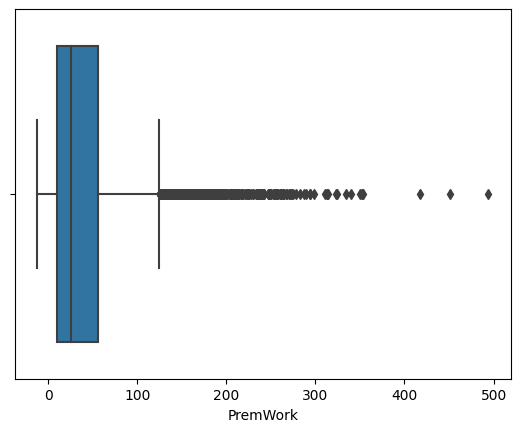

In [75]:
# start by taking a look at the boxplot again
sns.boxplot(x=X["PremWork"]); 

The more extreme outliers seem to be above the 400 level. Let's take a look.

In [76]:
X[X.PremWork>400]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
149,150.0,1989.0,1994.0,b'1 - Basic',984.0,4.0,1.0,255.71,0.63,64.90,197.25,29.56,18.56,451.53
1745,1746.0,1980.0,1999.0,b'1 - Basic',376.0,4.0,1.0,797.92,0.57,28.34,1223.00,106.91,65.68,494.10
1775,1776.0,1986.0,1993.0,b'2 - High School',1121.0,3.0,0.0,-318.73,1.42,37.45,123.35,68.79,54.12,417.08


Only 3 observations, so remove them.

In [77]:
X = X[X.PremWork<=400]

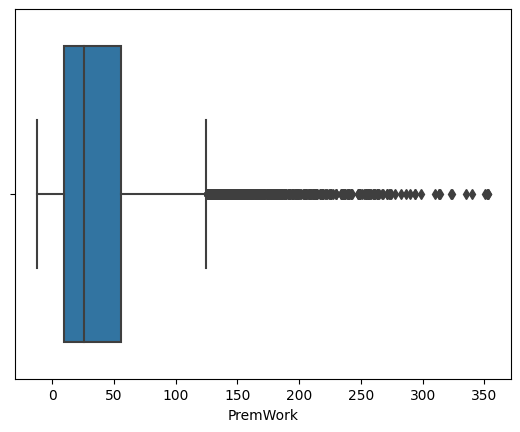

In [78]:
# final look at the boxplot
sns.boxplot(x=X["PremWork"]); # less extreme outliers 

There are still outliers left, but they seem to be a lot. Let's take a look at how many outliers we have above the 130 level.

In [79]:
X[X.PremWork>130]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
40,41.0,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
101,102.0,1981.0,1956.0,b'1 - Basic',2694.0,3.0,1.0,654.90,0.39,62.68,648.45,210.15,31.45,156.03
107,108.0,1989.0,1958.0,b'2 - High School',3673.0,3.0,1.0,133.81,0.77,292.61,108.35,117.91,12.67,146.14
147,148.0,1979.0,1954.0,b'2 - High School',2951.0,3.0,1.0,374.41,0.43,116.69,123.90,173.81,131.47,151.25
179,180.0,1984.0,1982.0,b'2 - High School',1739.0,3.0,0.0,284.07,0.60,99.02,263.95,158.03,45.12,209.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,10214.0,1988.0,1950.0,b'2 - High School',3330.0,1.0,0.0,175.05,0.61,126.69,-70.00,188.37,119.80,150.25
10222,10223.0,1988.0,1995.0,b'2 - High School',1686.0,3.0,1.0,610.44,0.42,72.46,654.00,125.58,114.80,133.36
10230,10231.0,1991.0,1996.0,b'1 - Basic',1594.0,3.0,0.0,1083.11,0.14,42.34,877.40,135.58,89.35,141.36
10253,10254.0,1985.0,1995.0,b'1 - Basic',952.0,1.0,1.0,17.01,0.96,14.56,637.35,134.58,128.47,155.92


There are 569 observations above the 130 level for the PremWork variable, so we confirm they are too much to remove.

#### Analysis after Outliers Removal

In [80]:
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10163.0,NaN,NaN,NaN,5154.917544,2970.114276,1.0,2585.5,5154.0,7724.5,10296.0
FirstPolYear,10163.0,NaN,NaN,NaN,1986.024599,6.607623,1974.0,1980.0,1986.0,1992.0,1998.0
BirthYear,10163.0,NaN,NaN,NaN,1968.094559,17.37868,1935.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10163,4,b'3 - BSc/MSc',4747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10163.0,NaN,NaN,NaN,2498.001279,984.2154,333.0,1706.0,2500.0,3290.0,5021.0
GeoLivArea,10163.0,NaN,NaN,NaN,2.711798,1.267152,1.0,1.0,3.0,4.0,4.0
Children,10163.0,NaN,NaN,NaN,0.706976,0.455172,0.0,0.0,1.0,1.0,1.0
CustMonVal,10163.0,NaN,NaN,NaN,218.589347,258.998522,-490.2,-9.105,187.26,399.58,2054.07
ClaimsRate,10163.0,NaN,NaN,NaN,0.679819,0.318856,0.0,0.39,0.72,0.98,1.55
PremMotor,10163.0,NaN,NaN,NaN,296.198686,138.691635,-4.11,190.37,298.39,407.41,585.22


After the removal of outliers that resulted from the boxplot analysis, we remain with 10163 observations in total. So, we lost only 0.4% of the observations since dealing with missing values (and -1.3% from the maximum of 10296 observations from the initial dataset, including missing values), which seems reasonable.

Let's visualize the final aspect of the boxplots after outlier removal:

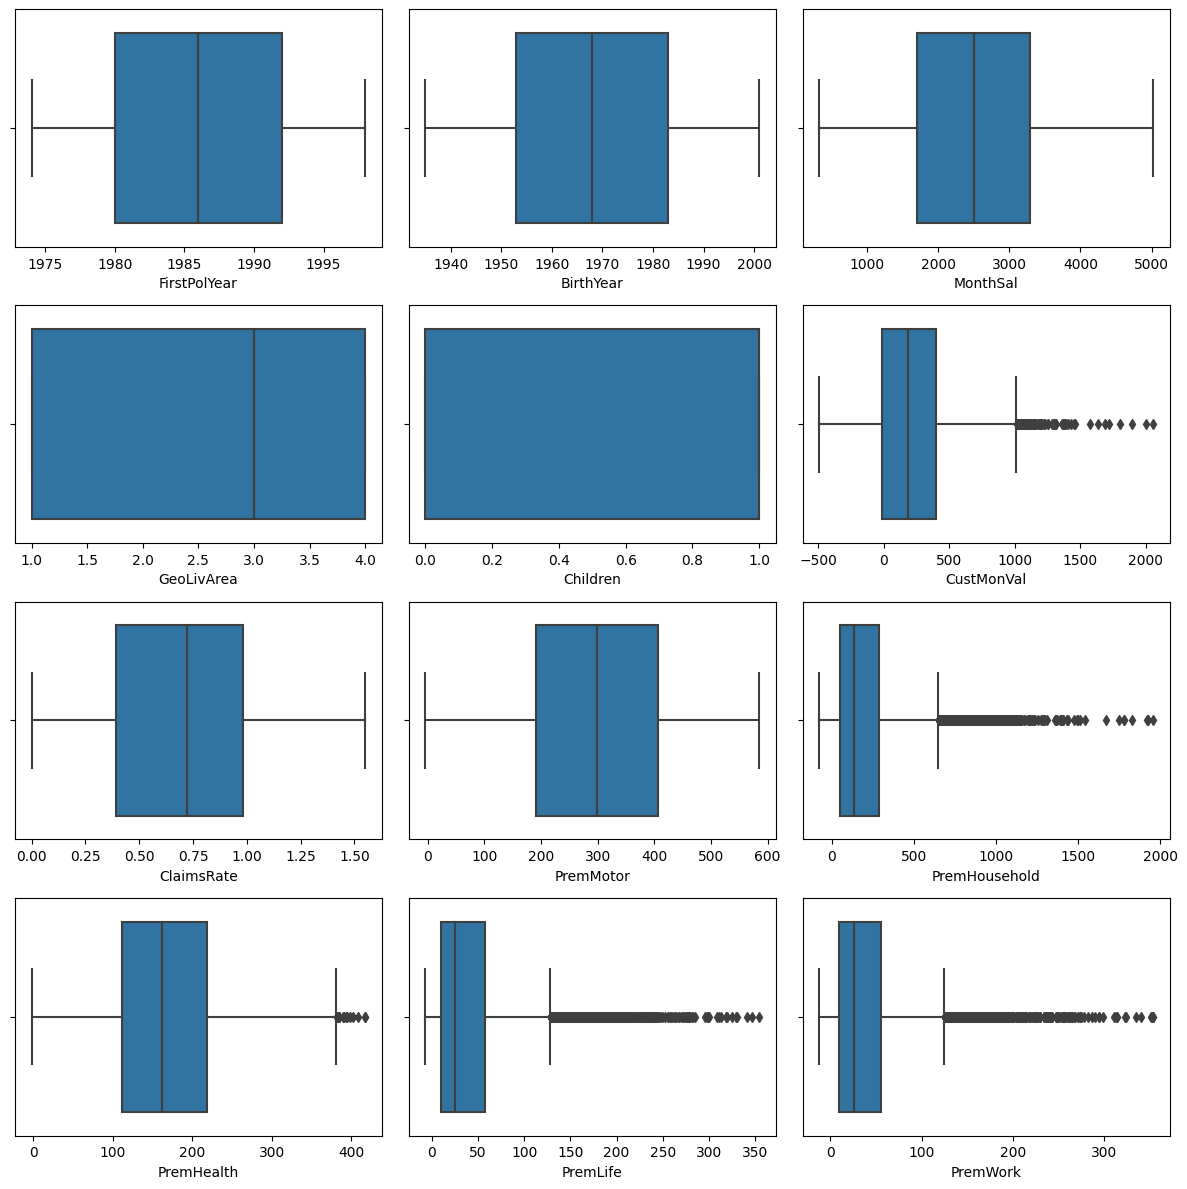

In [81]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(4, 3, figsize=(12, 12))
for var, subplot in zip(X[numericals[1:]], ax.flatten()):
    sns.boxplot(x=X[var], ax=subplot)
plt.tight_layout()

Comments:
- Only CustMonVal, PremHousehold, PremHealth, PremLife, PremWork variables remain with outliers, because they are too many to remove as discussed above. Therefore, they require some other kind of treatment such as binning.

### Other Changes

#### EducDeg
For the EducDeg (_Education Degree_) variable regarding which we did not do anything since this is a categorical variable with 4 categories, we will only simplify the categories' names by keeping only the number that charcaterizes each category (1 - Basic, 2 - High School, 3 - BSc/MSc, 4 - PhD).

In [82]:
# list current categories names
X.EducDeg.unique().tolist()

[b'2 - High School', b'1 - Basic', b'3 - BSc/MSc', b'4 - PhD']

In [83]:
X['EducDeg'].head(10) # sample before

0    b'2 - High School'
1    b'2 - High School'
2          b'1 - Basic'
3        b'3 - BSc/MSc'
4        b'3 - BSc/MSc'
5    b'2 - High School'
6    b'2 - High School'
7    b'2 - High School'
8        b'3 - BSc/MSc'
9        b'3 - BSc/MSc'
Name: EducDeg, dtype: object

In [84]:
X['EducDeg'] = X['EducDeg'].str.decode("utf-8") # decode strings from byte type
X['EducDeg'] = X['EducDeg'].str.extract('(\d+)') # keep only the number for each category

In [85]:
X['EducDeg'].head(10) # sample after

0    2
1    2
2    1
3    3
4    3
5    2
6    2
7    2
8    3
9    3
Name: EducDeg, dtype: object

Conversion seems good. Additionally, we will convert this variable into an integer for easier manipulation.

In [86]:
X['EducDeg'] = X['EducDeg'].astype(int) # Convert EducDeg to integer

In [87]:
X['EducDeg'].head(10) # sample after conversion to integer

0    2
1    2
2    1
3    3
4    3
5    2
6    2
7    2
8    3
9    3
Name: EducDeg, dtype: int64

Furthermore, we will consider merging the PhDs category with MSc/BScs.

EDUCDEG



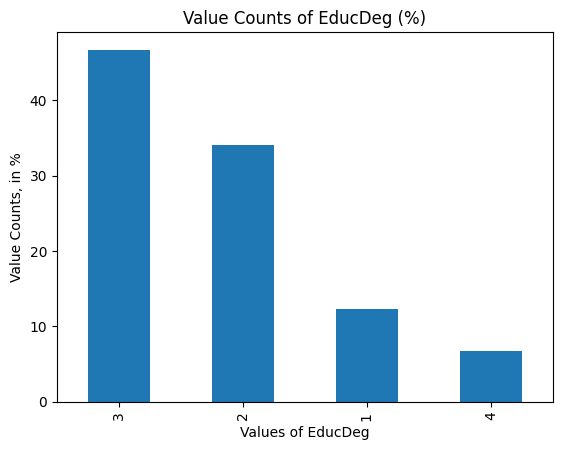

,EducDeg,%
3,4747,46.7
2,3470,34.1
1,1255,12.3
4,691,6.8


In [88]:
var = "EducDeg"
print(var.upper()+'\n') # Print Variable name in all caps

# make table with value counts in absolute and relative values
# store table in temporary df
df_temp = pd.concat([pd.DataFrame(X[var].value_counts()),
                     (100*pd.DataFrame(X[var].value_counts(normalize=True))).round(1)], # show value in %, rounded to 1 dec case
                    axis=1)
# rename percentage column to signal percentage (%)
df_temp.columns = [df_temp.columns[0], "%"]

# plot bar chart of percentages
df_temp["%"].plot(kind='bar',title="Value Counts of "+var+" (%)",
                  xlabel="Values of "+var, ylabel="Value Counts, in %")
plt.show() # force plot in each iteration

# show table
display(df_temp) # display the df

As we can see above, PhDs (category 4) are less than 10% of our observations (6.8%), so it can make sense to merge it with the other Higher Education category (3). Nonetheless, we will do some preliminary analysis on this PhDs segment to find out if there is something special about them, essentially regarding their purchasing power (through the _MonthSal_ variable) and their profitability to the company (through the _CustMonVal_ variable).

In [89]:
X.groupby("EducDeg")["MonthSal"].mean()

EducDeg
1    1983.057371
2    2487.308646
3    2617.585844
4    2665.425470
Name: MonthSal, dtype: float64

In [90]:
X.groupby("EducDeg")["CustMonVal"].mean()

EducDeg
1    276.887458
2    215.856573
3    206.898898
4    206.741520
Name: CustMonVal, dtype: float64

After analysing the breakdown of the variables _MonthSal_ and _CustMonVal_ between the different Education Degree categories, we see that they do not differ much from the category of BScs and MScs (3), so we might as well merge them into the same category, which may then be interpreted as Higher Education category.

In [91]:
# Merge 4 (PhDs) with 3 (BSc MSc)
X.loc[X.EducDeg==4,"EducDeg"] = 3 # which is now Higher Education category

In [92]:
any(X.EducDeg=="4")

False

EDUCDEG



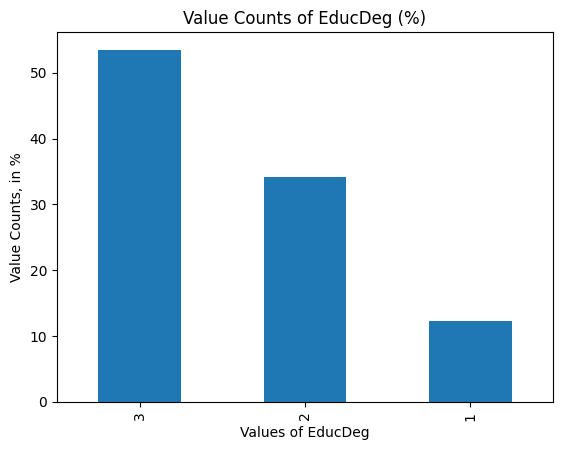

,EducDeg,%
3,5438,53.5
2,3470,34.1
1,1255,12.3


In [93]:
var = "EducDeg"
print(var.upper()+'\n') # Print Variable name in all caps

# make table with value counts in absolute and relative values
# store table in temporary df
df_temp = pd.concat([pd.DataFrame(X[var].value_counts()),
                     (100*pd.DataFrame(X[var].value_counts(normalize=True))).round(1)], # show value in %, rounded to 1 dec case
                    axis=1)
# rename percentage column to signal percentage (%)
df_temp.columns = [df_temp.columns[0], "%"]

# plot bar chart of percentages
df_temp["%"].plot(kind='bar',title="Value Counts of "+var+" (%)",
                  xlabel="Values of "+var, ylabel="Value Counts, in %")
plt.show() # force plot in each iteration

# show table
df_temp # display the df

### Feature Engineering

For Feature Engineering, we will compute the customers' age (in a new variable called _CustAge_) and the customers' tenure (years as a customer, in a new variable called _CustTenure_), that we will replace for the variables _BirthYear_ and _FirstPolYear_, respectivelly.

In [94]:
current_year

2016

#### Customers' Age

In [95]:
# compute customer age from BirthYear variable
# subtract year of birth to current year of dataset (2016) and store it in a new variable (CustAge)
X["CustAge"] = current_year - X["BirthYear"]
X[["CustID","BirthYear","CustAge"]].head(10) # take a look at the results

,CustID,BirthYear,CustAge
0,1.0,1982.0,34.0
1,2.0,1995.0,21.0
2,3.0,1970.0,46.0
3,4.0,1981.0,35.0
4,5.0,1973.0,43.0
5,6.0,1956.0,60.0
6,7.0,1943.0,73.0
7,8.0,1974.0,42.0
8,9.0,1978.0,38.0
9,10.0,1948.0,68.0


In [96]:
# seems ok, so we can remove the original variable BirthYear
X = X.drop("BirthYear", axis=1) # drop BirthYear column
X.head() # take a look at the resulting dataframe

,CustID,FirstPolYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge
0,1.0,1985.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0
1,2.0,1981.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0
2,3.0,1991.0,1,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0
3,4.0,1990.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0
4,5.0,1986.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0


#### Customers' Tenure

In [97]:
# compute years as a customer from the variable FirstPolYear
# subtract year of birth to current year of dataset (2016) and store it in a new variable (CustTenure)
X["CustTenure"] = current_year - X["FirstPolYear"]
X[["CustID","FirstPolYear","CustTenure"]].head(10) # take a look at the results

,CustID,FirstPolYear,CustTenure
0,1.0,1985.0,31.0
1,2.0,1981.0,35.0
2,3.0,1991.0,25.0
3,4.0,1990.0,26.0
4,5.0,1986.0,30.0
5,6.0,1986.0,30.0
6,7.0,1979.0,37.0
7,8.0,1988.0,28.0
8,9.0,1981.0,35.0
9,10.0,1976.0,40.0


In [98]:
# seems ok, so we can remove the original variable FirstPolYear
X = X.drop("FirstPolYear", axis=1) # drop BirthYear column
X.head() # take a look at the resulting dataframe

,CustID,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,CustTenure
0,1.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0,31.0
1,2.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,35.0
2,3.0,1,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0,25.0
3,4.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0,26.0
4,5.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0,30.0


We will now analyse the cases in which the customer age is less than its tenure, since it does not make sense, as explained in the Data Understanding section (it is equivalent to the value of FirstPolYear being older than the BirthYear).

In [99]:
X[X.CustAge<X.CustTenure].count()[0]

1969

In [100]:
1969/10163

0.19374200531339172

As seen above, there is a high number of cases in which the customer age is less than its tenure. It represents around 19% (1969/10163) of the total dataset, which is strange for what due to its impossibility seems like a data error. As previously hypothesized, it can be the cases where customers were initially included in their parents policies and, for that reason, they "inherited" the value of the FirstPolYear variable of their parents.  
However, it still does not make sense to have the customer Tenure larger than the customer age, so we propose to signall this cases with a dummy variable (due to its high proportion in the dataset), and replace the value of the original tenure (larger than the customers age) by the average Tenure of the corresponding age (without the observations affected by the issue). Even though the number of observations is high to replace, we think it does not make sense to keep it like it is and we also keep track of the changed variables with the created dummy variable.

In [101]:
# signal the cases where tenure>age with a new dummy TenLAge (Tenure Larger than Age)
X["TenLAge"] = (X.CustAge<X.CustTenure).astype(int)
X.head(10) # see the resulting dataframe

,CustID,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,CustTenure,TenLAge
0,1.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0,31.0,0
1,2.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,35.0,1
2,3.0,1,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0,25.0,0
3,4.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0,26.0,0
4,5.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0,30.0,0
5,6.0,2,2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,60.0,30.0,0
6,7.0,2,4103.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34,73.0,37.0,0
7,8.0,2,1743.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23,42.0,28.0,0
8,9.0,3,1862.0,1.0,1.0,356.53,0.36,344.51,18.35,210.04,8.78,9.89,38.0,35.0,0
9,10.0,3,3842.0,1.0,0.0,-119.35,1.12,209.26,182.25,271.94,39.23,55.12,68.0,40.0,0


In [102]:
# we can now also specifically index the cases where the issue occurs with this new dummy
X.loc[X.TenLAge==1,:]

,CustID,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,CustTenure,TenLAge
1,2.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,35.0,1
13,14.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46,16.0,33.0,1
18,19.0,1,1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57,34.0,35.0,1
22,23.0,2,1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90,30.0,40.0,1
40,41.0,2,1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03,21.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,10269.0,3,1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.46,28.0,29.0,1
10273,10274.0,2,1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.12,24.0,27.0,1
10284,10285.0,3,1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,0.00,29.0,36.0,1
10288,10289.0,2,1465.0,1.0,1.0,795.15,0.35,67.79,820.15,102.13,182.48,86.46,23.0,34.0,1


We have 1969 observations, as seen before.

In [103]:
# compute average tenure for each age, for the observations not affected by the issue
avg_tenure_by_age = X.loc[X.TenLAge==0,:].groupby("CustAge")["CustTenure"].mean() # store it in a new dataframe
avg_tenure_by_age # see the results

CustAge
19.0    18.600000
20.0    19.000000
21.0    19.750000
22.0    20.393939
23.0    21.051282
          ...    
77.0    30.103093
78.0    29.052632
79.0    29.321429
80.0    29.513514
81.0    27.857143
Name: CustTenure, Length: 63, dtype: float64

In [104]:
# furthermore, round the average to zero decimal cases
avg_tenure_by_age = avg_tenure_by_age.round(0)
avg_tenure_by_age # see the results

CustAge
19.0    19.0
20.0    19.0
21.0    20.0
22.0    20.0
23.0    21.0
        ... 
77.0    30.0
78.0    29.0
79.0    29.0
80.0    30.0
81.0    28.0
Name: CustTenure, Length: 63, dtype: float64

In [105]:
# confirm that the average tenure is not greater than the customers age
any(avg_tenure_by_age > avg_tenure_by_age.index) # no True value, so average tenure is never greater than the customers age

False

In [106]:
# get ages of customers in this situation to a list
ages_specialcase =  X.loc[X.TenLAge==1,"CustAge"].tolist()
print(set(ages_specialcase)) # check unique values of age for the customers in that situation

{15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0}


In [107]:
# see the ages of the customers not in that situation through the index of the avg_tenure_by_age df
avg_tenure_by_age.index

Float64Index([19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0,
              30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0,
              41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0,
              52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0,
              63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0,
              74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0],
             dtype='float64', name='CustAge')

Indeed, the ages of the customers for which the tenure is greater seem to be smaller than the ages for the rest of the customers, since they go from 15 to 41 and for the rest of the dataset they go from 19 to 81, as seen above. This seems to support our hypothesis that these are the cases where customers were initially included in their parents policies and, for that reason, they "inherited" the value of the FirstPolYear variable of their parents. Hence the younger ages for the customers in that situation.

In [108]:
# see which ages from the customers with the issue are not in the index of the avg_tenure_by_age,
#  since it will cause an indexing error when replacing the ages
unavailable_ages = [age for age in set(ages_specialcase) if age not in avg_tenure_by_age.index]
unavailable_ages

[15.0, 16.0, 17.0, 18.0]

Since the age values that are not available for the rest of the customers and they are inferior (min age for the rest of the customers is 19), we think they should be replaced by the customers age (i.e. for these unavailable age values, the tenure should be equal to the age (from ages 15-18)). To put that in practice, we will add this mapping to the _avg_tenure_by_age_ pandas series.

In [109]:
# construct series with the mapping for the ages 15-18
special_ages = list(np.arange(15.0,18.0+1))
special_ages_series = pd.Series(special_ages, index=special_ages)
special_ages_series

15.0    15.0
16.0    16.0
17.0    17.0
18.0    18.0
dtype: float64

In [110]:
# concatenate special ages with the avg_tenure_by_age
avg_tenure_by_age = pd.concat([special_ages_series, avg_tenure_by_age])

In [111]:
# visualize resulting series
avg_tenure_by_age

15.0    15.0
16.0    16.0
17.0    17.0
18.0    18.0
19.0    19.0
        ... 
77.0    30.0
78.0    29.0
79.0    29.0
80.0    30.0
81.0    28.0
Length: 67, dtype: float64

In [112]:
avg_tenure_by_age[X.loc[X.TenLAge==1,"CustAge"]]

21.0    20.0
16.0    16.0
34.0    27.0
30.0    25.0
21.0    20.0
        ... 
28.0    23.0
24.0    22.0
29.0    24.0
23.0    21.0
17.0    17.0
Length: 1969, dtype: float64

In [113]:
avg_tenure_by_age[X.loc[X.TenLAge==1,"CustAge"]].values

array([20., 16., 27., ..., 24., 21., 17.])

In [114]:
# replace the average tenure with the average tenure according to the age, computed from the rest of the dataset
X.loc[X.TenLAge==1,"CustTenure"] = avg_tenure_by_age[X.loc[X.TenLAge==1,"CustAge"]].values
X.loc[X.TenLAge==1,:].head(10) # see the resulting dataframe for observations affected by the issue

,CustID,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,CustTenure,TenLAge
1,2.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,20.0,1
13,14.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46,16.0,16.0,1
18,19.0,1,1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57,34.0,27.0,1
22,23.0,2,1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90,30.0,25.0,1
40,41.0,2,1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03,21.0,20.0,1
44,45.0,3,1065.0,1.0,1.0,-128.68,1.19,111.80,-35.00,208.26,224.71,44.23,26.0,22.0,1
46,47.0,3,1219.0,4.0,1.0,-94.90,1.08,269.94,300.60,143.25,59.79,69.90,30.0,25.0,1
71,72.0,3,1159.0,4.0,1.0,195.82,0.72,150.03,236.70,286.61,70.79,33.23,27.0,23.0,1
95,96.0,3,2668.0,4.0,1.0,-25.00,1.00,296.50,70.00,200.15,60.79,8.67,30.0,25.0,1
105,106.0,3,2019.0,4.0,1.0,-2.65,0.97,89.24,82.25,408.41,19.56,40.34,28.0,23.0,1


In [115]:
# check if CustTenure > CustAge no longer occurs
any(X.CustAge<X.CustTenure) # False, so no remaining cases

False

In [116]:
X.head(10) # take a look at the general dataframe

,CustID,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,CustTenure,TenLAge
0,1.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0,31.0,0
1,2.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,20.0,1
2,3.0,1,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0,25.0,0
3,4.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0,26.0,0
4,5.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0,30.0,0
5,6.0,2,2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,60.0,30.0,0
6,7.0,2,4103.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34,73.0,37.0,0
7,8.0,2,1743.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23,42.0,28.0,0
8,9.0,3,1862.0,1.0,1.0,356.53,0.36,344.51,18.35,210.04,8.78,9.89,38.0,35.0,0
9,10.0,3,3842.0,1.0,0.0,-119.35,1.12,209.26,182.25,271.94,39.23,55.12,68.0,40.0,0


### Variables to consider

In this section we remove the variables that are not needed.  
Let's start with CustID, since it does not have any meaning besides uniquely identifying the customers.

#### Remove CustID

In [117]:
# remove CustID
X = X.drop('CustID', axis=1)

In [118]:
X.head(10)

,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,CustTenure,TenLAge
0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0,31.0,0
1,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,20.0,1
2,1,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0,25.0,0
3,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0,26.0,0
4,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0,30.0,0
5,2,2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,60.0,30.0,0
6,2,4103.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34,73.0,37.0,0
7,2,1743.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23,42.0,28.0,0
8,3,1862.0,1.0,1.0,356.53,0.36,344.51,18.35,210.04,8.78,9.89,38.0,35.0,0
9,3,3842.0,1.0,0.0,-119.35,1.12,209.26,182.25,271.94,39.23,55.12,68.0,40.0,0


#### ClaimsRate vs. CustMonVal

For the variables ClaimsRate and CustMonVal, we will see if the strong correlation still holds after the removal of outliers. Furthermore we will plot again the correlation matrix for the variables.

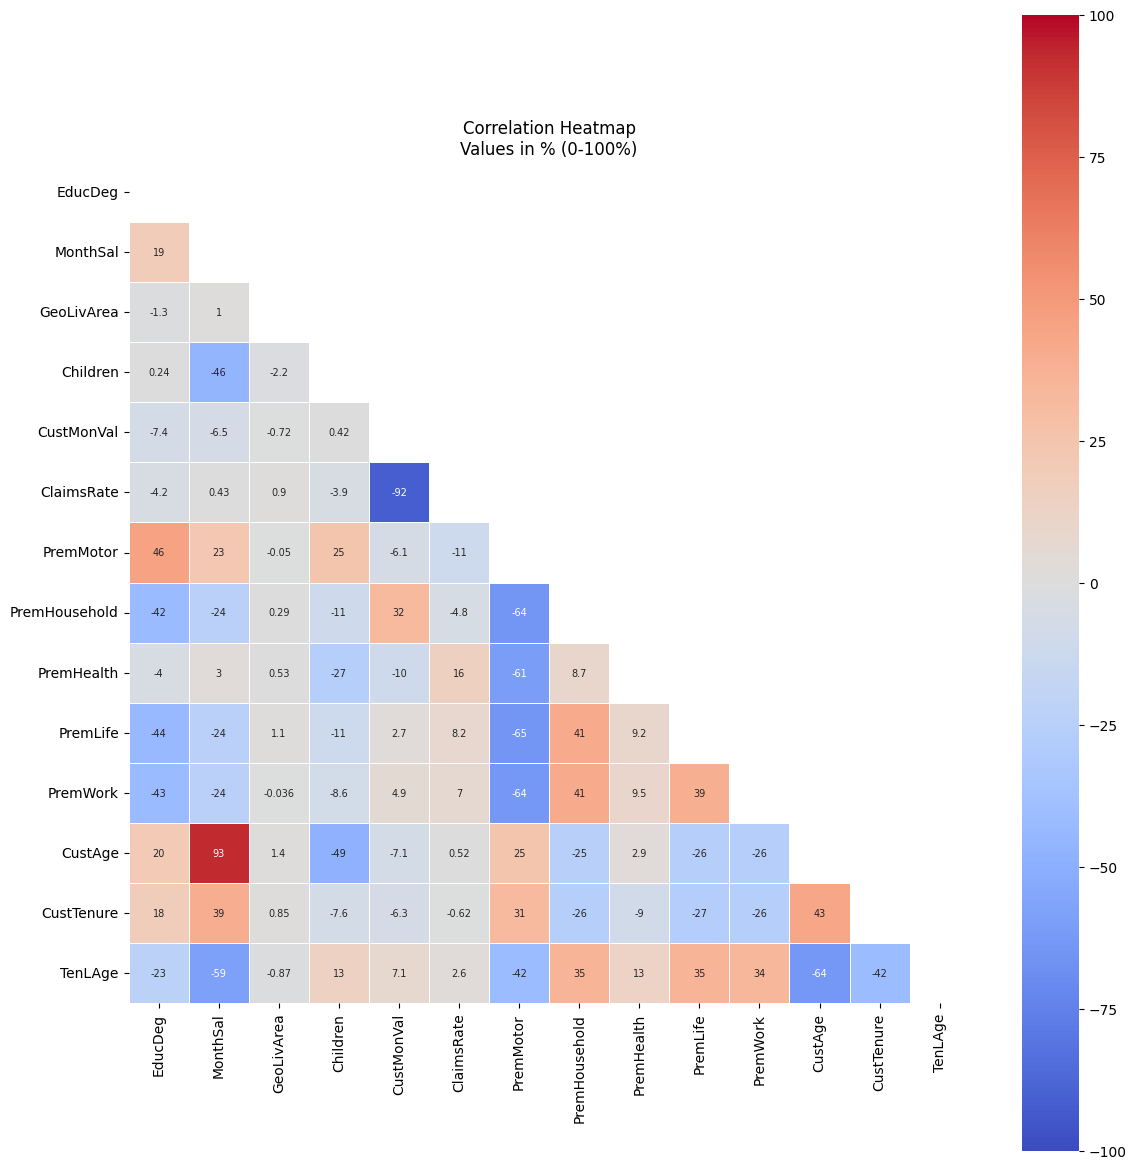

In [119]:
# adapted from code from class
corr = X.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12))
heatmap = sns.heatmap(corr*100,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -100,
                      vmax = 100,
                      annot = True,
                      annot_kws = {'size': 7})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('Correlation Heatmap\nValues in % (0-100%)')
plt.tight_layout() # avoid overlaping of axis labels

Comments:
- After the data treament carried out, the ClaimsRate and CustMonVal decreased their correlation, but it still remains very high at -92%
- The Newly created variable _CustAge_ (Customers' age) has an even stronger correlation with the _MonthSal_ variable (Monthly Salary) than the _BirthYear_ had, scoring at 93%, the highest correlation in our dataset. However, as explained in the Data Understanding section, since income and age are two classical customer segmentation factors, we think it does not make sense to remove any of them.
- The premiums for the other LOBs Household, Health, Life and Work have a moderately high negative correlation with the Premium in the Motor LOB. That is probably due to a some form of discount in the other segments according to what the customer pays on the Motor LOB. The correlation is in general stronger and in some cases much stronger than before our data treatment, which is very likely related to the removal of outliers in the different LOBs.

Since the strong correlation still holds between the _ClaimsRate_ and _CustMonVal_ variables (of -92% after data treatment), we will choose between one of them and remove the other, since the strong relation indicates that they are approximately signalling the same information. Since this clustering analysis is targeted to the marketing department, we will choose to remain with variable _CustMonVal_, since it will probably more familiar to the final customer of this analysis, as it relates more directly with the profitability and cost of each customer.

In [120]:
# remove ClaimsRate variable
X = X.drop('ClaimsRate', axis=1)

In [121]:
X.head() # visualize current dataframe

,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,CustTenure,TenLAge
0,2,2177.0,1.0,1.0,380.97,375.85,79.45,146.36,47.01,16.89,34.0,31.0,0
1,2,677.0,4.0,1.0,-131.13,77.46,416.20,116.69,194.48,106.13,21.0,20.0,1
2,1,2277.0,3.0,0.0,504.67,206.15,224.50,124.58,86.35,99.02,46.0,25.0,0
3,3,1099.0,4.0,1.0,-16.99,182.48,43.35,311.17,35.34,28.34,35.0,26.0,0
4,3,1763.0,4.0,1.0,35.23,338.62,47.80,182.59,18.78,41.45,43.0,30.0,0


### Encoding Categorical Variables into Dummies

In [122]:
xD = X.copy() # create df with dummies from copy of previous df

In [123]:
xD['Children'].unique()

array([1., 0.])

In [124]:
# Children variable is already a dummy, so only convert it to integer
xD['Children'] = xD['Children'].astype(int)

In [125]:
# also convert "GeoLivArea" to integer in order to simplify dummies' names
xD['GeoLivArea'] = xD['GeoLivArea'].astype(int)

Convert _EducDeg_ and _GeoLivArea_ variables which are categorical into dummies for each category.

In [126]:
# this is similar to one-hot enconding, but simpler to implement
xD = pd.get_dummies(data=xD,columns=['EducDeg', 'GeoLivArea'],drop_first=False)

In [127]:
xD.head()

,MonthSal,Children,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,CustTenure,TenLAge,EducDeg_1,EducDeg_2,EducDeg_3,GeoLivArea_1,GeoLivArea_2,GeoLivArea_3,GeoLivArea_4
0,2177.0,1,380.97,375.85,79.45,146.36,47.01,16.89,34.0,31.0,0,0,1,0,1,0,0,0
1,677.0,1,-131.13,77.46,416.20,116.69,194.48,106.13,21.0,20.0,1,0,1,0,0,0,0,1
2,2277.0,0,504.67,206.15,224.50,124.58,86.35,99.02,46.0,25.0,0,1,0,0,0,0,1,0
3,1099.0,1,-16.99,182.48,43.35,311.17,35.34,28.34,35.0,26.0,0,0,0,1,0,0,0,1
4,1763.0,1,35.23,338.62,47.80,182.59,18.78,41.45,43.0,30.0,0,0,0,1,0,0,0,1


### Binning

We will bin all the numeric variables because we think it will allow to better differenciate the clusters as well as improve its interpretability.  
However, we know it comes at the cost of increasing the cardinality of the dataset, since each "bin" will correspond to a new dummy variable.  
Therefore, with the exception of the _CustAge_ and _CustTenure_ variables (for which we will do a binning with more intervals, we will only make split each variable into three bins that are easy to interpret: low, medium and high. In that case, the attribution to each bin will be made by splitting the data into 3 bins with the same quantity of observations (so each bin will have 33.3% of the data each).  
For the variables _CustAge_ and _CustTenure_, we will split into more bins. Let's start with those.

In [128]:
xD.describe(include='all').T["count"] # we want to make sure we don't lose observations

MonthSal         10163.0
Children         10163.0
CustMonVal       10163.0
PremMotor        10163.0
PremHousehold    10163.0
PremHealth       10163.0
PremLife         10163.0
PremWork         10163.0
CustAge          10163.0
CustTenure       10163.0
TenLAge          10163.0
EducDeg_1        10163.0
EducDeg_2        10163.0
EducDeg_3        10163.0
GeoLivArea_1     10163.0
GeoLivArea_2     10163.0
GeoLivArea_3     10163.0
GeoLivArea_4     10163.0
Name: count, dtype: float64

#### CustAge

For the _CustAge_ variable, we will use a binning with intervals of 10 years each, since this is usually good to differentiate between the different stages of life. 

In [129]:
# get min and max for CustAge
xD["CustAge"].describe()[["min","max"]]

min    15.0
max    81.0
Name: CustAge, dtype: float64

In [130]:
# Bin the CustAge according to custom intervals
CustAgeIntervals = [14,19,29,39,49,59,69,999]
CustAgeIntervalLabels = ['15-19','20-29', '30-39', '40-49','50-59', '60-69', '70+']
xD['CustAge'] = pd.cut(xD['CustAge'], bins = CustAgeIntervals, labels=CustAgeIntervalLabels)

In [131]:
# check value counts after binning
xD['CustAge'].value_counts(normalize=True)

60-69    0.171111
50-59    0.170029
30-39    0.167765
40-49    0.163239
20-29    0.158221
70+      0.136180
15-19    0.033455
Name: CustAge, dtype: float64

_CustAge_ bins are pretty uniform, with the exception of the bins at the extremes.  
Also, it should also be noticed that we get 7 bins for this variable with this custom binning.

In [132]:
# get dummy for each bin
xD = pd.get_dummies(data=xD, columns=["CustAge"], drop_first=False)
xD.head() # look at result

,MonthSal,Children,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustTenure,TenLAge,...,GeoLivArea_2,GeoLivArea_3,GeoLivArea_4,CustAge_15-19,CustAge_20-29,CustAge_30-39,CustAge_40-49,CustAge_50-59,CustAge_60-69,CustAge_70+
0,2177.0,1,380.97,375.85,79.45,146.36,47.01,16.89,31.0,0,...,0,0,0,0,0,1,0,0,0,0
1,677.0,1,-131.13,77.46,416.20,116.69,194.48,106.13,20.0,1,...,0,0,1,0,1,0,0,0,0,0
2,2277.0,0,504.67,206.15,224.50,124.58,86.35,99.02,25.0,0,...,0,1,0,0,0,0,1,0,0,0
3,1099.0,1,-16.99,182.48,43.35,311.17,35.34,28.34,26.0,0,...,0,0,1,0,0,1,0,0,0,0
4,1763.0,1,35.23,338.62,47.80,182.59,18.78,41.45,30.0,0,...,0,0,1,0,0,0,1,0,0,0


#### CustTenure

In [133]:
# get min and max for CustAge
xD["CustTenure"].describe()[["min","max"]]

min    15.0
max    42.0
Name: CustTenure, dtype: float64

The span of the Customer Tenure variable is shorter, but in general tenure it is high (15+ years), so we think it also makes sense to consider intervals of 10 years. 

In [134]:
# Bin the CustTenure according to custom intervals
CustTenureIntervals = [14,19,29,999]
CustTenureIntervalLabels = ['15-19','20-29','30+']
xD['CustTenure'] = pd.cut(xD['CustTenure'], bins = CustTenureIntervals, labels=CustTenureIntervalLabels)

In [135]:
# check value counts after binning
xD['CustTenure'].value_counts(normalize=True)

20-29    0.549542
30+      0.368986
15-19    0.081472
Name: CustTenure, dtype: float64

_CustTenure_ bins are not so uniform, but we will stick to them since they are easy to understand.  
It is also worth noticing that the custom binning chosen with intervals of roughly 10 years for each bin, resulted in a total of 3 bins.

In [136]:
# get dummy for each bin
xD = pd.get_dummies(data=xD, columns=["CustTenure"], drop_first=False)
xD.head() # look at result

,MonthSal,Children,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TenLAge,EducDeg_1,...,CustAge_15-19,CustAge_20-29,CustAge_30-39,CustAge_40-49,CustAge_50-59,CustAge_60-69,CustAge_70+,CustTenure_15-19,CustTenure_20-29,CustTenure_30+
0,2177.0,1,380.97,375.85,79.45,146.36,47.01,16.89,0,0,...,0,0,1,0,0,0,0,0,0,1
1,677.0,1,-131.13,77.46,416.20,116.69,194.48,106.13,1,0,...,0,1,0,0,0,0,0,0,1,0
2,2277.0,0,504.67,206.15,224.50,124.58,86.35,99.02,0,1,...,0,0,0,1,0,0,0,0,1,0
3,1099.0,1,-16.99,182.48,43.35,311.17,35.34,28.34,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1763.0,1,35.23,338.62,47.80,182.59,18.78,41.45,0,0,...,0,0,0,1,0,0,0,0,0,1


#### Remaining Variables
For the remaining variables that are still not binned/dummied, we will apply a binning of 3: low, medium and high as explained above.

In [137]:
# list of variables to bin
vars_to_bin = [var for var in xD.columns
               if "_" not in var # exclude categorical variables already converted to dummies
               # exclude dummy variables and CustAge and CustTenure (which are special cases)
               and var not in ("Children", "TenLAge", "CustAge", "CustTenure")]
vars_to_bin

['MonthSal',
 'CustMonVal',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

In [138]:
# we will use a for loop in order to bin all variables in the same way
for var in vars_to_bin:
    xD[var] = pd.qcut(xD[var], 3, labels=["Low","Med","High"])

In [139]:
# see value counts of example variable to see if it occured as expected
xD["MonthSal"].value_counts() # each bin has 33.3% of the data, so it's ok

Low     3388
High    3388
Med     3387
Name: MonthSal, dtype: int64

In [140]:
# get dummy for each bin
xD = pd.get_dummies(data=xD, columns=vars_to_bin, drop_first=False)
xD.head() # look at result

,Children,TenLAge,EducDeg_1,EducDeg_2,EducDeg_3,GeoLivArea_1,GeoLivArea_2,GeoLivArea_3,GeoLivArea_4,CustAge_15-19,...,PremHousehold_High,PremHealth_Low,PremHealth_Med,PremHealth_High,PremLife_Low,PremLife_Med,PremLife_High,PremWork_Low,PremWork_Med,PremWork_High
0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [141]:
# list all the variables
xD.columns

Index(['Children', 'TenLAge', 'EducDeg_1', 'EducDeg_2', 'EducDeg_3',
       'GeoLivArea_1', 'GeoLivArea_2', 'GeoLivArea_3', 'GeoLivArea_4',
       'CustAge_15-19', 'CustAge_20-29', 'CustAge_30-39', 'CustAge_40-49',
       'CustAge_50-59', 'CustAge_60-69', 'CustAge_70+', 'CustTenure_15-19',
       'CustTenure_20-29', 'CustTenure_30+', 'MonthSal_Low', 'MonthSal_Med',
       'MonthSal_High', 'CustMonVal_Low', 'CustMonVal_Med', 'CustMonVal_High',
       'PremMotor_Low', 'PremMotor_Med', 'PremMotor_High', 'PremHousehold_Low',
       'PremHousehold_Med', 'PremHousehold_High', 'PremHealth_Low',
       'PremHealth_Med', 'PremHealth_High', 'PremLife_Low', 'PremLife_Med',
       'PremLife_High', 'PremWork_Low', 'PremWork_Med', 'PremWork_High'],
      dtype='object')

In [142]:
xD.describe(include='all').T["count"].min() # check if we remain with the same number of observations

10163.0

The number of observations is the same as before binning, so it seems that it went well without losing any observations.

#### Correlation After Binning Analysis
After binning all the variables, we want to see if there is come new correlations.

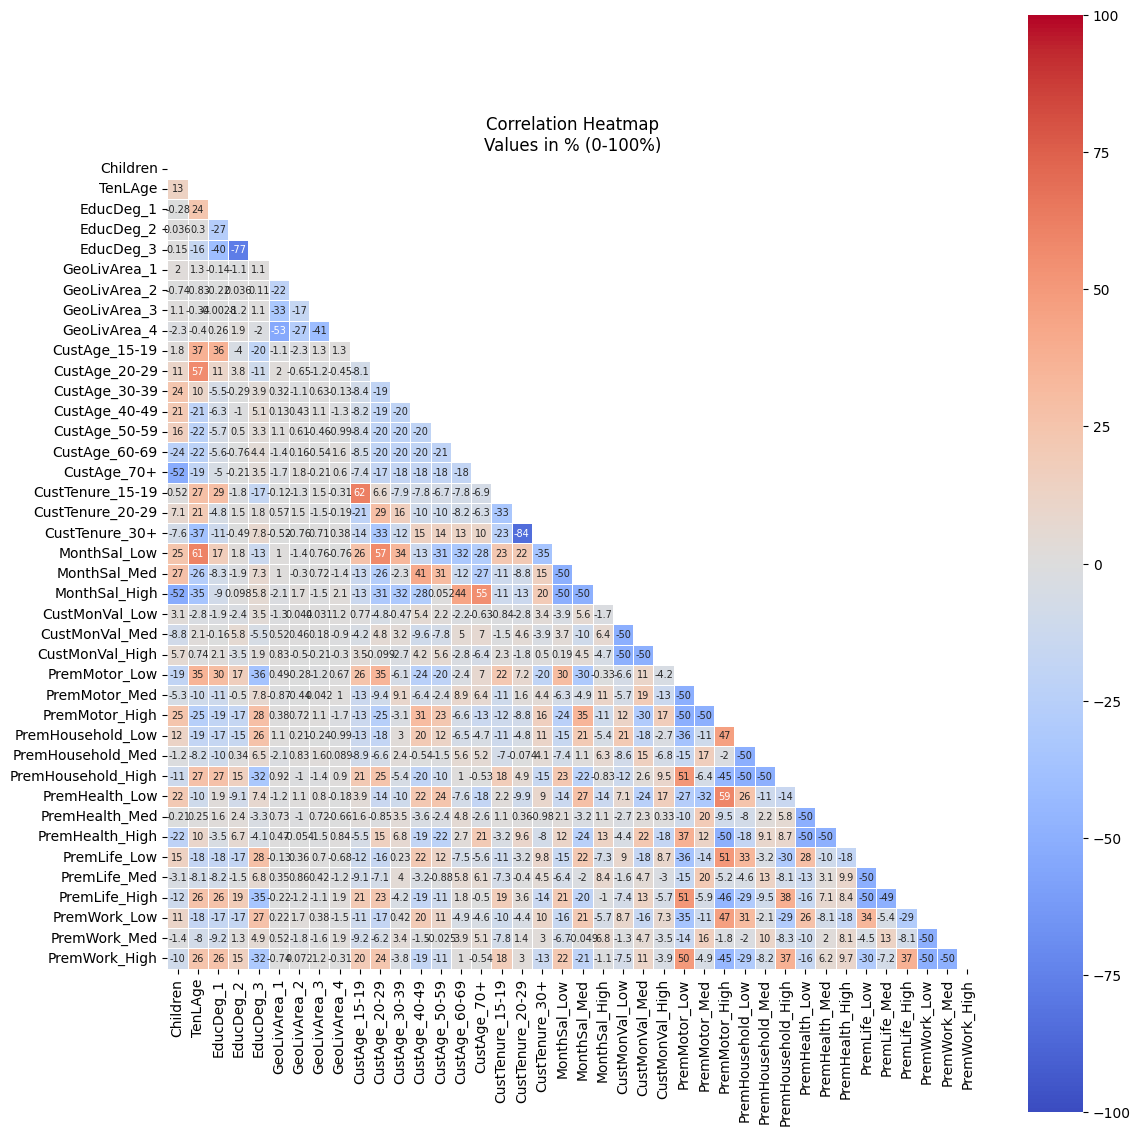

In [143]:
# adapted from code from class
corr = xD.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12))
heatmap = sns.heatmap(corr*100,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -100,
                      vmax = 100,
                      annot = True,
                      annot_kws = {'size': 7})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('Correlation Heatmap\nValues in % (0-100%)')
plt.tight_layout() # avoid overlaping of axis labels

There seems to be strong correlations (above +/-70%) for different bins of the same variable, which makes sense since bins are mutually exclusive. So we see no need to remove any more variables.

### Normalization 
Since we only have dummy variables in our dataset, no normalization is needed (variables are all at the discrete scale of 0-1).

## Modelling

In [144]:
# number of variables in the preprocessed dataset.
len(xD.columns)

40

Since we binned all numeric variables, we ended up increasing the cardinality of the dataset up to 40 variables.  
To deal with that, we will use PCA to reduce cardinality of the Dataset, since the K-Means algorith suffers from the curse of dimensionality.

### PCA for Dimension Reduction

In [145]:
# importing needed packages for the modelling and clustering section
from matplotlib import ticker
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [146]:
# plots configurations - code from class
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

In [147]:
# code from class
# Fit the PCA algorithm to data 
pca = PCA().fit(xD)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(xD.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.161185,0.161185
1,2,0.093277,0.254462
2,3,0.070817,0.325279
3,4,0.056890,0.382169
4,5,0.047369,0.429538
5,6,0.045561,0.475099
6,7,0.044766,0.519865
7,8,0.043353,0.563218
8,9,0.041309,0.604527
9,10,0.037598,0.642124


Text(0.5, 1.0, 'Explained variance by components')

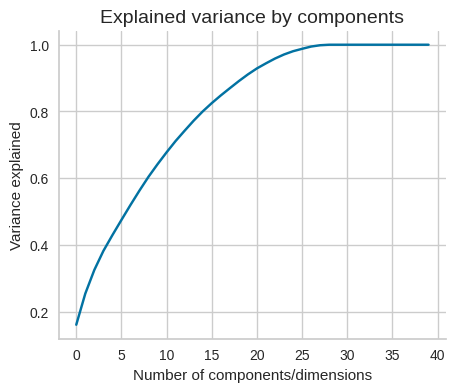

In [148]:
# code from class
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.title('Explained variance by components', fontsize=plots_Title_fontSize)

With 25 components, we can already explain 98% of the variance in the data, while reducing the cardinality from 40 to 25 (-37.5%).

In [149]:
# based on code from class
# Apply the dimension reduction to the dataset (for 25 components)
pca_reduced = PCA(n_components = 25)
pca_reduced.fit(xD)
X_pca_reduced = pca_reduced.transform(xD) 
print(X_pca_reduced.shape)

(10163, 25)


In [150]:
# code from class
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca_reduced.components_,columns=xD.columns)
wheightsDF

,Children,TenLAge,EducDeg_1,EducDeg_2,EducDeg_3,GeoLivArea_1,GeoLivArea_2,GeoLivArea_3,GeoLivArea_4,CustAge_15-19,...,PremHousehold_High,PremHealth_Low,PremHealth_Med,PremHealth_High,PremLife_Low,PremLife_Med,PremLife_High,PremWork_Low,PremWork_Med,PremWork_High
0,-0.091209,0.170518,0.092810,0.128079,-0.220889,-0.000695,-0.002483,-0.005294,0.008472,0.039956,...,0.260382,-0.218984,0.038583,0.180401,-0.254882,-0.008934,0.263816,-0.244084,-0.015818,0.259902
1,-0.288264,-0.224429,-0.082385,-0.001448,0.083833,-0.017559,0.002398,-0.004150,0.019311,-0.047828,...,-0.096290,-0.219517,0.059916,0.159601,-0.113975,0.191514,-0.077539,-0.087697,0.160567,-0.072870
2,0.143340,0.111203,-0.092183,-0.180363,0.272546,0.020564,0.000788,0.004553,-0.025906,-0.046449,...,-0.198685,-0.203647,0.065833,0.137815,-0.004206,0.196527,-0.192322,-0.004959,0.179253,-0.174294
3,0.272402,-0.046573,-0.000286,0.339151,-0.338865,0.006207,-0.008008,0.011696,-0.009895,0.000871,...,-0.020049,-0.040789,0.262041,-0.221252,-0.157951,0.138486,0.019465,-0.153230,0.148368,0.004862
4,-0.040016,0.030269,0.062509,-0.292014,0.229505,0.157870,0.006548,0.046773,-0.211191,0.025744,...,0.167046,-0.061727,0.404675,-0.342948,-0.035813,0.030905,0.004908,0.014993,-0.081101,0.066108
5,-0.048983,-0.020505,-0.013893,0.064625,-0.050733,-0.515502,-0.035834,-0.135382,0.686718,-0.009277,...,0.052534,0.002224,0.176495,-0.178719,0.005132,-0.011139,0.006006,-0.040670,0.090296,-0.049626
6,0.010081,0.043658,0.043306,-0.117760,0.074454,0.013238,-0.008143,0.009384,-0.014479,0.030211,...,0.050665,-0.219922,0.425696,-0.205774,-0.042328,-0.025871,0.068199,0.002245,-0.082987,0.080742
7,-0.110328,-0.110343,-0.083135,0.344794,-0.261659,0.258054,0.025481,0.020494,-0.304029,-0.059652,...,0.048285,0.011608,0.107737,-0.119344,-0.015598,0.037909,-0.022310,-0.065049,0.161383,-0.096334
8,0.048398,0.084679,0.038188,-0.056012,0.017824,0.040311,-0.014487,-0.023670,-0.002154,0.033257,...,0.129462,0.079761,-0.204754,0.124993,-0.212891,0.405045,-0.192155,-0.268449,0.434663,-0.166213
9,-0.005885,0.003124,-0.009573,0.099767,-0.090194,-0.075964,0.023280,0.050963,0.001722,-0.001196,...,-0.047956,0.026629,-0.041064,0.014435,-0.279939,0.537400,-0.257461,0.324023,-0.550690,0.226667


### Determination of Number of Clusters

#### Elbow Method

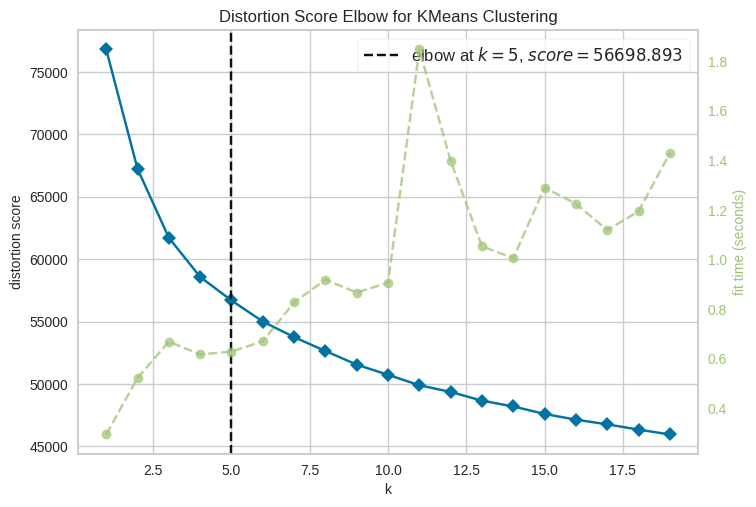

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
# code from class
# Apply the Elbow method to select K
km = KMeans(n_init=10) # set n_init=10 to avoid warning
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(X_pca_reduced) 
visualizer.show()

#### Silhouette Method

Text(0.5, 1.0, 'Silhouette method - Reduced dimensionality')

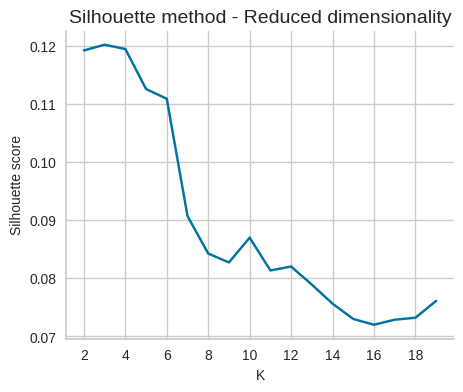

In [154]:
# code from class
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 20):
  km = KMeans(n_clusters = k, random_state=123, n_init=10).fit(X_pca_reduced)
  labels = km.labels_
  sil.append(silhouette_score(X_pca_reduced, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 20), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=plots_Title_fontSize)

The Elbow method points to 5 clusters (k=5), while the Silhouette points to a k=3.  
We will analyse the clusters in both cases to see which one appears best.

### Cluster Evaluation 

#### K=3 (Silhouette Method)

In [155]:
# code from class
# Apply the K-Means for K=3
K=3
kmeans_k3 = KMeans(n_clusters=K, random_state=123, n_init=10) # set n_init=10 to avoid warning
allDistances_k3 = kmeans_k3.fit_transform(X_pca_reduced)
y_kmeans_k3 = kmeans_k3.predict(X_pca_reduced)

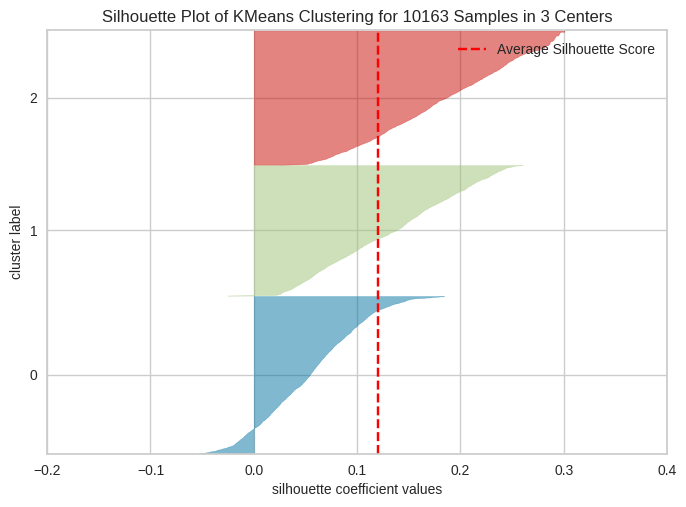

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10163 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [156]:
#code from class
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans_k3, colors='yellowbrick')
visualizer.fit(X_pca_reduced)
visualizer.show()

In [157]:
# based on code from class
def plot_clusters_cardinality(df, y_kmeans):
  # Plot clusters cardinality 

  # Count observations per cluster
  freqByCluster = df.groupby(y_kmeans).size()

  # Draw
  fig, ax = plt.subplots(figsize=(7,5))
  g = sns.countplot(x=y_kmeans, color='grey')

  # Decoration
  fmt = "{x:,.0f}"
  tick = ticker.StrMethodFormatter(fmt)
  ax.yaxis.set_major_formatter(tick)
  for index,data in enumerate(freqByCluster):
      plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
  sns.despine()
  plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
  plt.xlabel("Cluster")
  plt.ylabel("Frequency in cluster")
  plt.rc('axes', labelsize=subPlots_label_fontSize)

  return freqByCluster

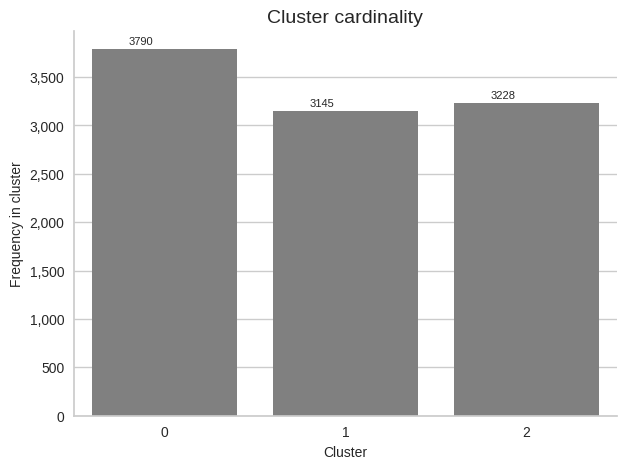

In [158]:
freqByCluster_k3 = plot_clusters_cardinality(xD, y_kmeans_k3)

In [159]:
# based on code from class
def plot_clusters_magnitude(df,y_kmeans, allDistances):
  # Plot clusters magnitude

  # Compute Magnitude
  df_temp = df.copy()
  df_temp['distanceToCentroid'] = np.min(allDistances,axis=1)
  magnitude = df_temp['distanceToCentroid'].groupby(y_kmeans).sum()
  df_temp = df_temp.drop(columns=['distanceToCentroid'])

  # Draw
  fig, ax = plt.subplots(figsize=(7,5))
  g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

  # Decoration
  fmt = "{x:,.0f}"
  tick = ticker.StrMethodFormatter(fmt)
  ax.yaxis.set_major_formatter(tick)
  for index,data in enumerate(magnitude):
      plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
  sns.despine()
  plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
  plt.xlabel("Cluster")
  plt.ylabel("Sum of distances to centroid")
  plt.rc('axes', labelsize=subPlots_label_fontSize)

  return magnitude

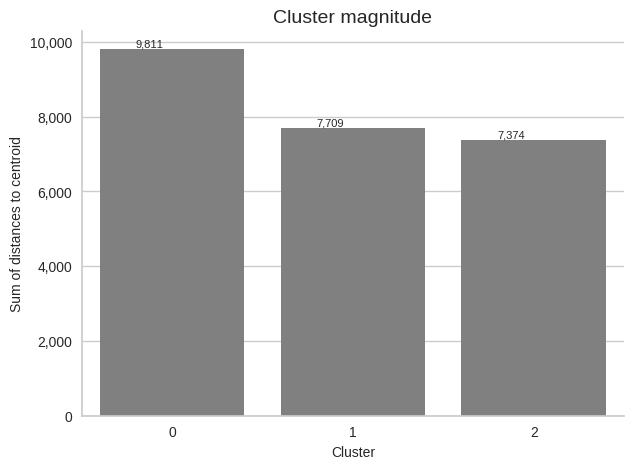

In [160]:
magnitude_k3 = plot_clusters_magnitude(xD, y_kmeans_k3, allDistances_k3)

In [161]:
#based on code from class
def plot_cardinality_vs_magnitude(freqByCluster, magnitude):
  # Plot cardinality vs magnitude

  # Draw
  fig, ax = plt.subplots(figsize=(6,4))
  g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

  # Decoration
  fmt = "{x:,.0f}"
  tick = ticker.StrMethodFormatter(fmt)
  ax.xaxis.set_major_formatter(tick)
  ax.yaxis.set_major_formatter(tick)
  sns.despine()
  plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
  plt.xlabel("Cardinality")
  plt.ylabel("Magnitude")
  plt.rc('axes', labelsize=subPlots_label_fontSize)

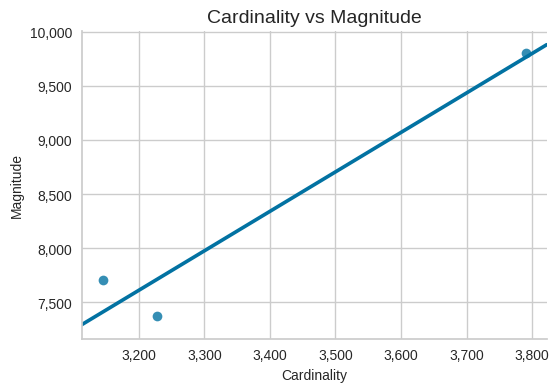

In [162]:
plot_cardinality_vs_magnitude(freqByCluster_k3, magnitude_k3)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


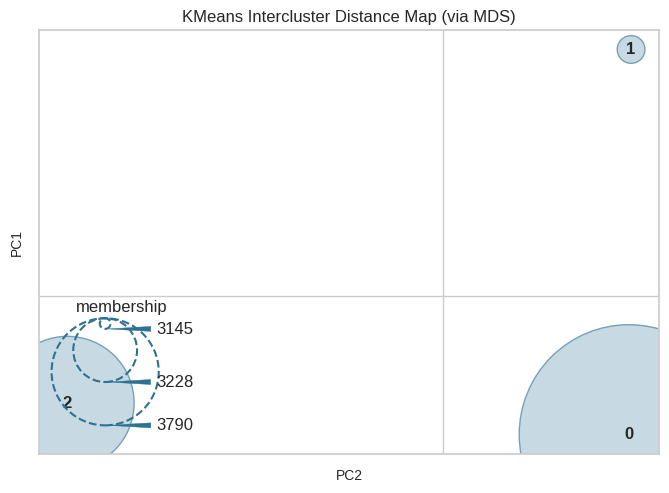

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [163]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans_k3)
visualizer.fit(X_pca_reduced)
visualizer.show()

Clusters seem to be weel separated in the plot above.

#### K=5 (Elbow Method)

In [164]:
# code from class
# Apply the K-Means for K=5
K=5
kmeans_k5 = KMeans(n_clusters=K, random_state=123, n_init=10) # set n_init=10 to avoid warning
allDistances_k5 = kmeans_k5.fit_transform(X_pca_reduced)
y_kmeans_k5 = kmeans_k5.predict(X_pca_reduced)

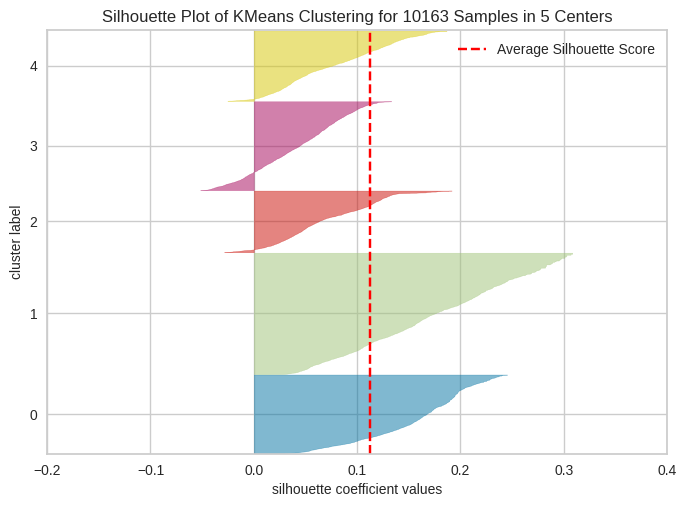

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10163 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [165]:
#code from class
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans_k5, colors='yellowbrick')
visualizer.fit(X_pca_reduced)
visualizer.show()

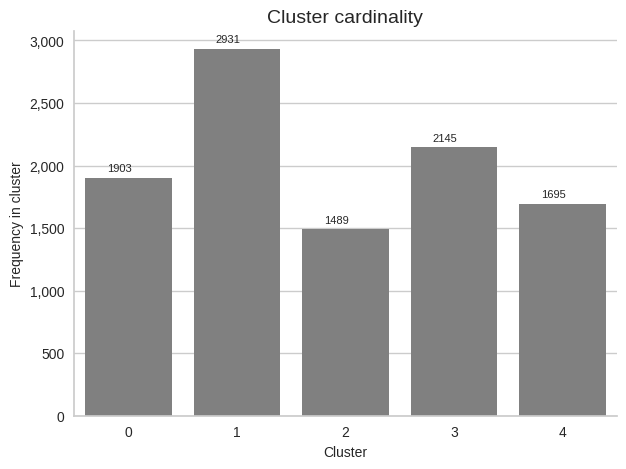

In [166]:
freqByCluster_k5 = plot_clusters_cardinality(xD, y_kmeans_k5)

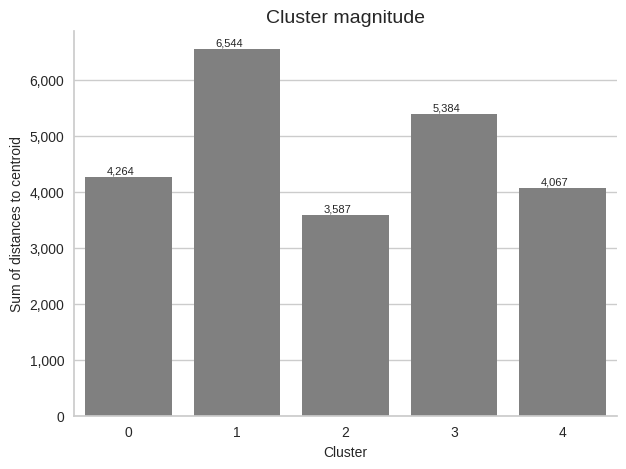

In [167]:
magnitude_k5 = plot_clusters_magnitude(xD, y_kmeans_k5, allDistances_k5)

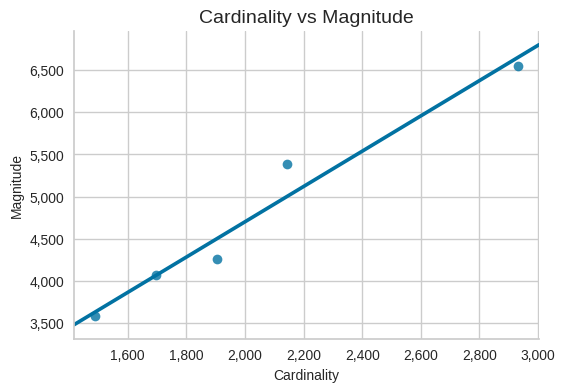

In [168]:
plot_cardinality_vs_magnitude(freqByCluster_k5, magnitude_k5)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


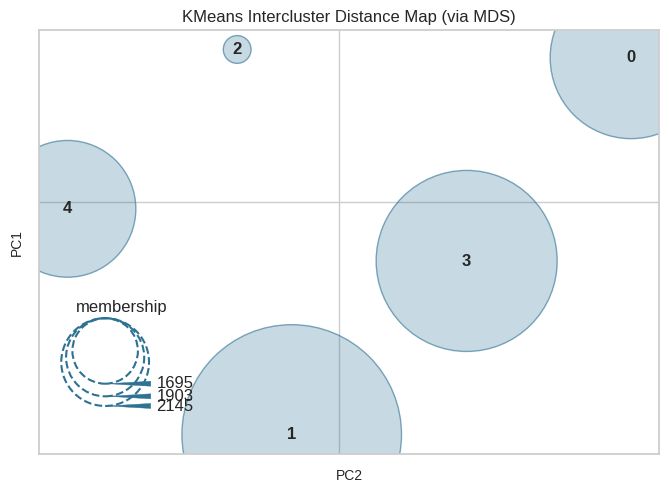

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [169]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans_k5)
visualizer.fit(X_pca_reduced)
visualizer.show()

Clusters seem to be weel separated in the plot above.

According to the analysis of the Cardinality vs Magnitude plot for both k=3 and k=6, the clusters seem to be closer to the scatter plot's regression line when k=5, which indicates a better balance between cardinality and magnitude and, therefore, better clusters.
Thus, we will choose to split the customers in 5 clusters.

## (TO DO) Cluster Analysis

In [176]:
# Check the mean values of each cluster with k=6
top_features = xD.columns
clustersMeanDF = pd.DataFrame(xD[top_features].groupby(y_kmeans_k5).mean(),columns=top_features)
clustersMeanDF = clustersMeanDF.reindex(sorted(clustersMeanDF.columns), axis=1)
# since all variables are bins, we can convert all the numbers to percentages (0-100%)
(100*clustersMeanDF.transpose()).round(0)

,0,1,2,3,4
Children,81.0,91.0,35.0,92.0,29.0
CustAge_15-19,18.0,0.0,0.0,0.0,0.0
CustAge_20-29,64.0,2.0,0.0,15.0,0.0
CustAge_30-39,17.0,14.0,4.0,42.0,0.0
CustAge_40-49,1.0,37.0,6.0,21.0,1.0
CustAge_50-59,0.0,33.0,18.0,14.0,12.0
CustAge_60-69,0.0,10.0,39.0,7.0,42.0
CustAge_70+,0.0,4.0,34.0,0.0,45.0
CustMonVal_High,35.0,46.0,31.0,23.0,24.0
CustMonVal_Low,29.0,44.0,26.0,30.0,30.0


In [173]:
clustersMeanDF.transpose().to_csv("clusters.csv");

In [174]:
files.download('clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

__Cluster 0__ :  Teenagers and Young Parents, with Low Salaries and Less Education
- 81% has children
- 64% are aged between 20-29
- 18% are aged between 15-19 (captures almost all customers of these ages)
- 99% are less than 40 years old
- 97% have salaries on the bottom 33% of all customers
- 34% only have basic education (highest from all clusters)
- Average profitability for the company (uniform Customer Value between the 3 catgories/bins)
- 94% have low motor premiums

__Cluster 1__ :  Highly Educated Middle Age Parents
- 70% are aged between 40 and 59 years old
- 91% has children
- Polarized profitability for the company, either high value (46%) or low value (44%), but very little in between (10%)
- 74% has Higher Education
- Have average salaries (64% have medium salaries, low and high have similar percentages)
- 99% have high motor premiums
- Have low premiums for non-motor (Health, Household, Life and and Work, all have around 70% of customers from this cluster with low premiums)

__Cluster 2__ :  Older adults with Average Education, High Purchasing Power and without Children
- Average education: 62% has Secondary School, only 17% has higher education (the lowest from all clusters), 20% has only basic education
- 90% are more than 50 years old
- High Purchasing Power: 76% earn on the top 33% from all customers
- Only 35% has children
- Average profitability for the company
- (TO DO) Analyse Premiums

__Cluster 3__ :  Parents with Medium-Low Salaries
- 92% have children
- Medium Low Salaries (only 1 % has salaries on top 33% from all customers, 50% have medium salaries and the 50% low)
- Not very old: 79% are up to 50 years old
- Medium to Higher Education: 58% has higher education and 35% has Secndary School
- Medium tenure: 67% have a tenure of 20-29 years (middle category)
- (TO DO) Analyse Premiums

__Cluster 4__ :  Highly Educated Older People, with Very High Purchasing Power and no Children
- 78% have Higher Education
- 88% are more than 60 years old
- 99% have salaries on the top 33% from all customers
- Only 29% has children (the lowest from all clusters)
- Average profitability for the company



Comments:
 - From a machine learning perspective, after doing this first clustering, we would remove the variables that did not serve to differentiate between the different clusters, as they seem to be only noise in terms of clustering and, therefore, we would expect it would improve the clustering. Example of such variables: GeoLivArea (very similar distribution among all clusters), Customer Tenure (does not vary much and seems to be more correlated with the customer's age).

## (TO DO) Marketing Approach Recommendation

Can charge more to cluster 2, because it has high salaries and lower education, no children and only give average profits for the company.